/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_7140/1486088909.py:10: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_data = pd.read_csv('Ames Real Estate Data.csv')


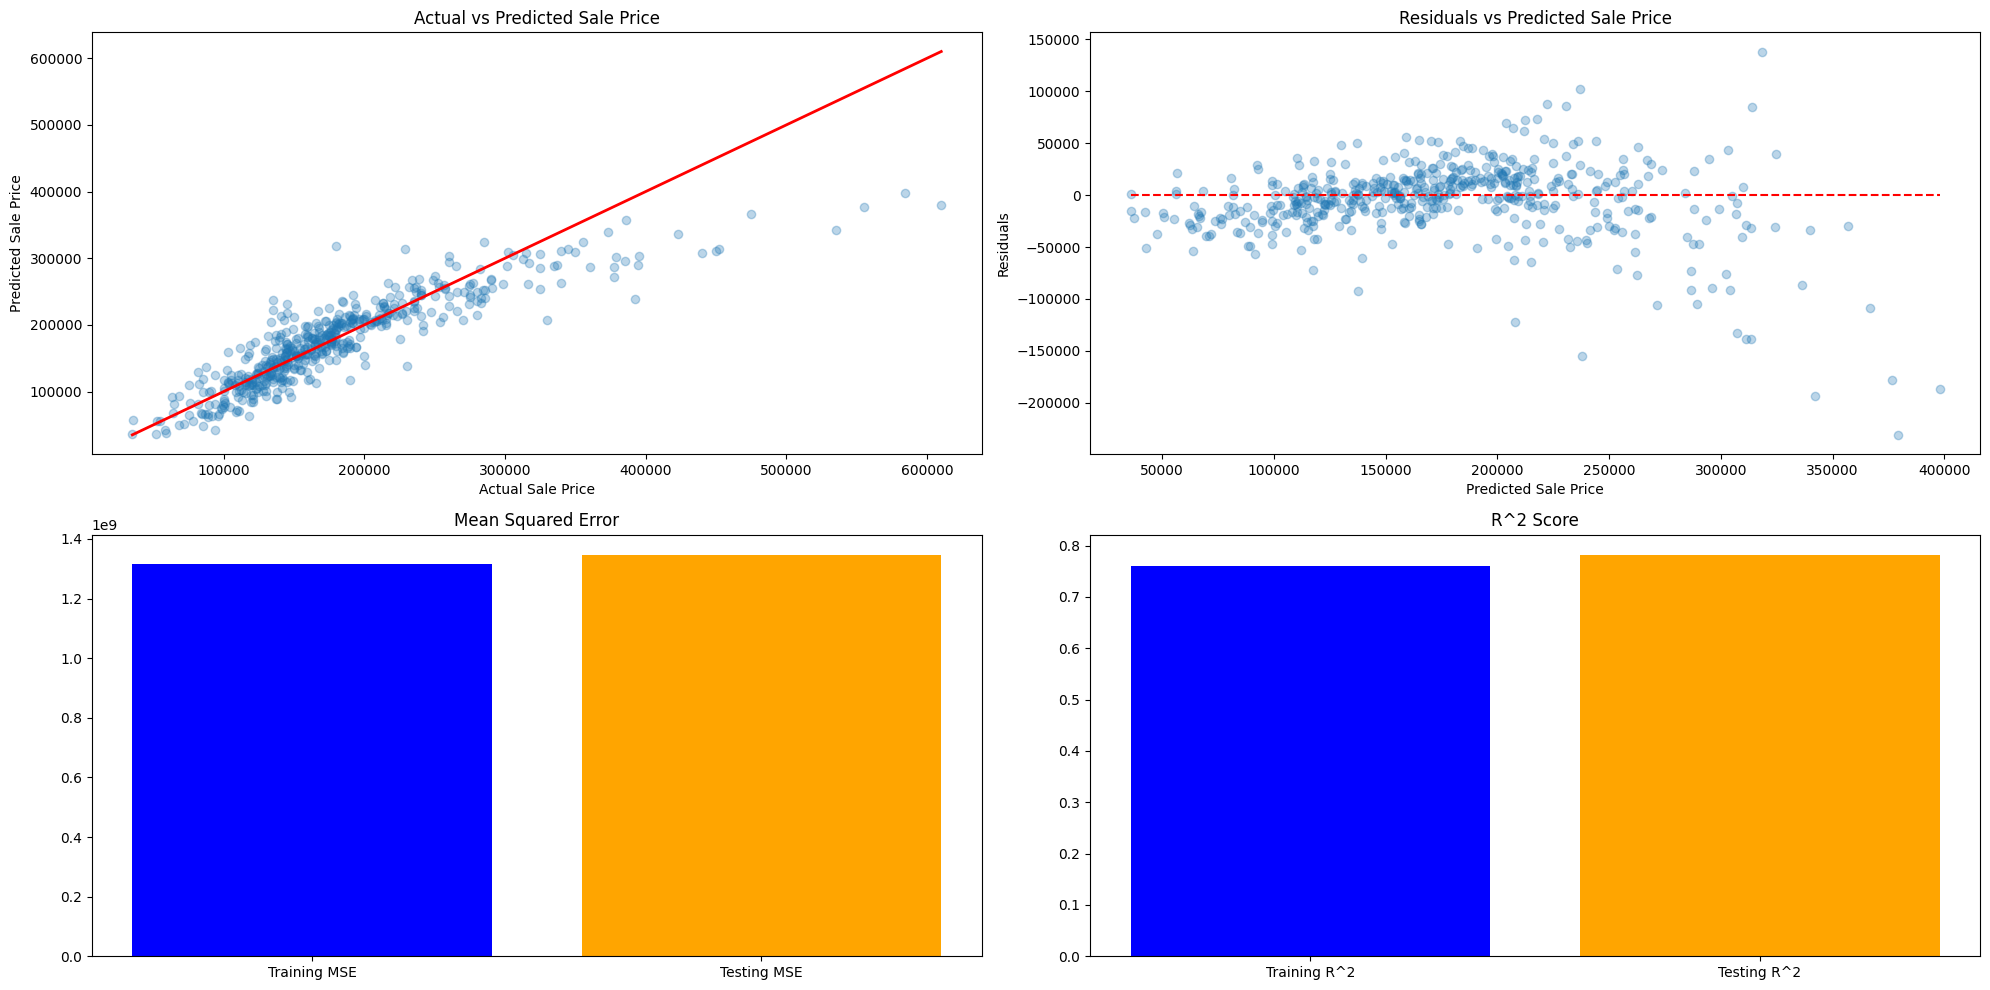

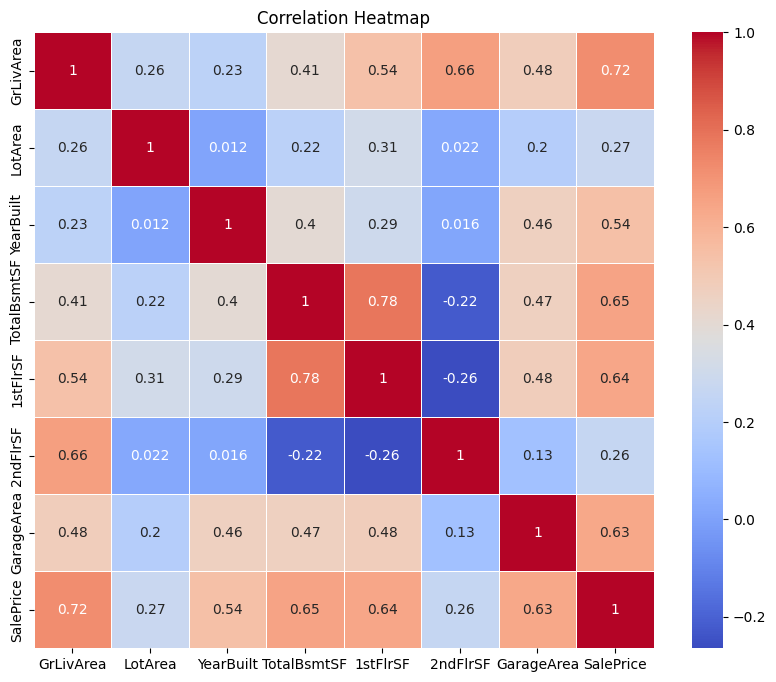

0.7602686800050096
0.7821845251585302


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load the two CSV files
real_estate_data = pd.read_csv('Ames Real Estate Data.csv')
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Display the first few rows of each dataframe to understand their structure
real_estate_data_head = real_estate_data.head()
house_price_data_head = house_price_data.head()

real_estate_data_head, house_price_data_head


# Prepare the data
# Selecting a subset of features and target variable for simplicity
features = ['GrLivArea', 'LotArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea']
target = 'SalePrice'

# Drop rows with missing values
house_price_data_clean = house_price_data[features + [target]].dropna()

# Split the data into training and testing sets
X = house_price_data_clean[features]
y = house_price_data_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Prepare data for heatmap
correlation_matrix = house_price_data_clean.corr()

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred, y_test_pred - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values = [mse_train, mse_test]
mse_labels = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels, mse_values, color=['blue', 'orange'])
plt.title('Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values = [r2_train, r2_test]
r2_labels = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels, r2_values, color=['blue', 'orange'])
plt.title('R^2 Score')

plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print(r2_train)
print(r2_test)


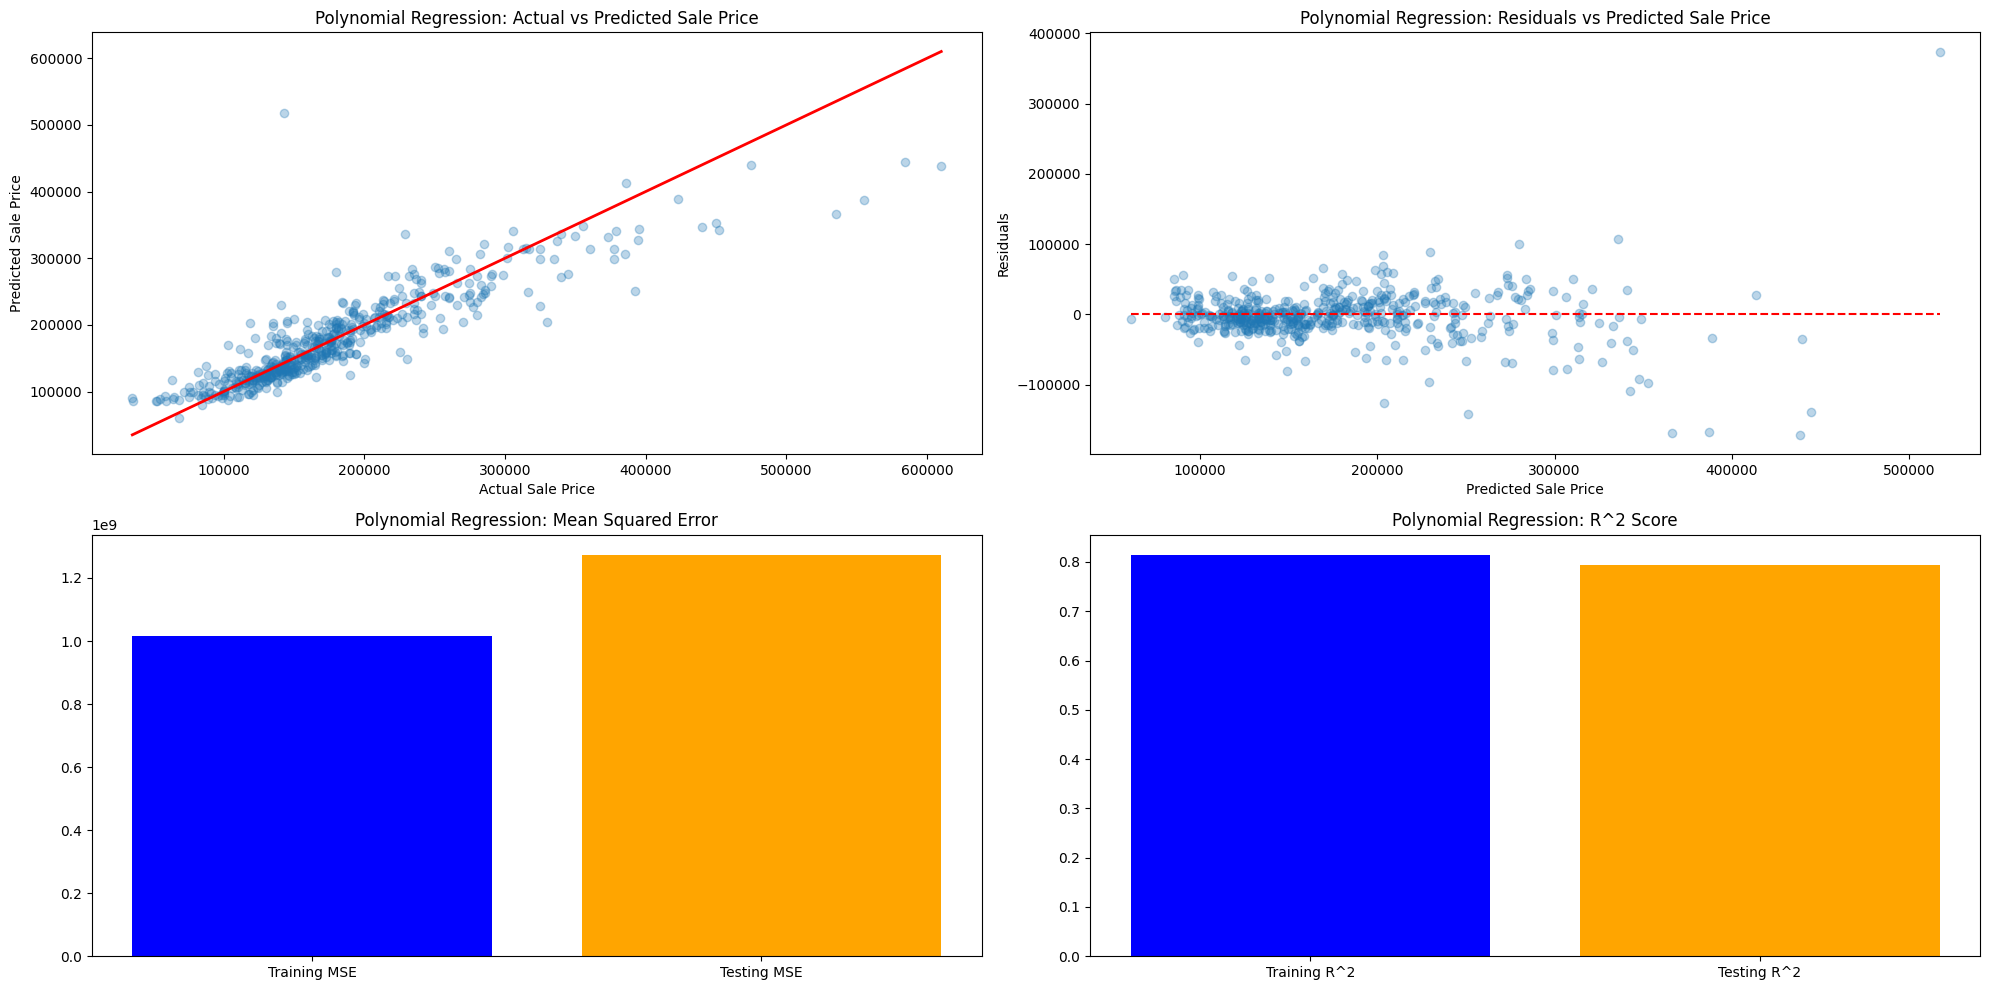

0.8147270147001205
0.7940652997095895


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit a polynomial regression model (degree 2 for simplicity)
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Calculate metrics
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred_poly, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Polynomial Regression: Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred_poly, y_test_pred_poly - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred_poly.min(), xmax=y_test_pred_poly.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Polynomial Regression: Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values_poly = [mse_train_poly, mse_test_poly]
mse_labels_poly = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels_poly, mse_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values_poly = [r2_train_poly, r2_test_poly]
r2_labels_poly = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels_poly, r2_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: R^2 Score')

plt.tight_layout()
plt.show()
print(r2_train_poly)
print(r2_test_poly)


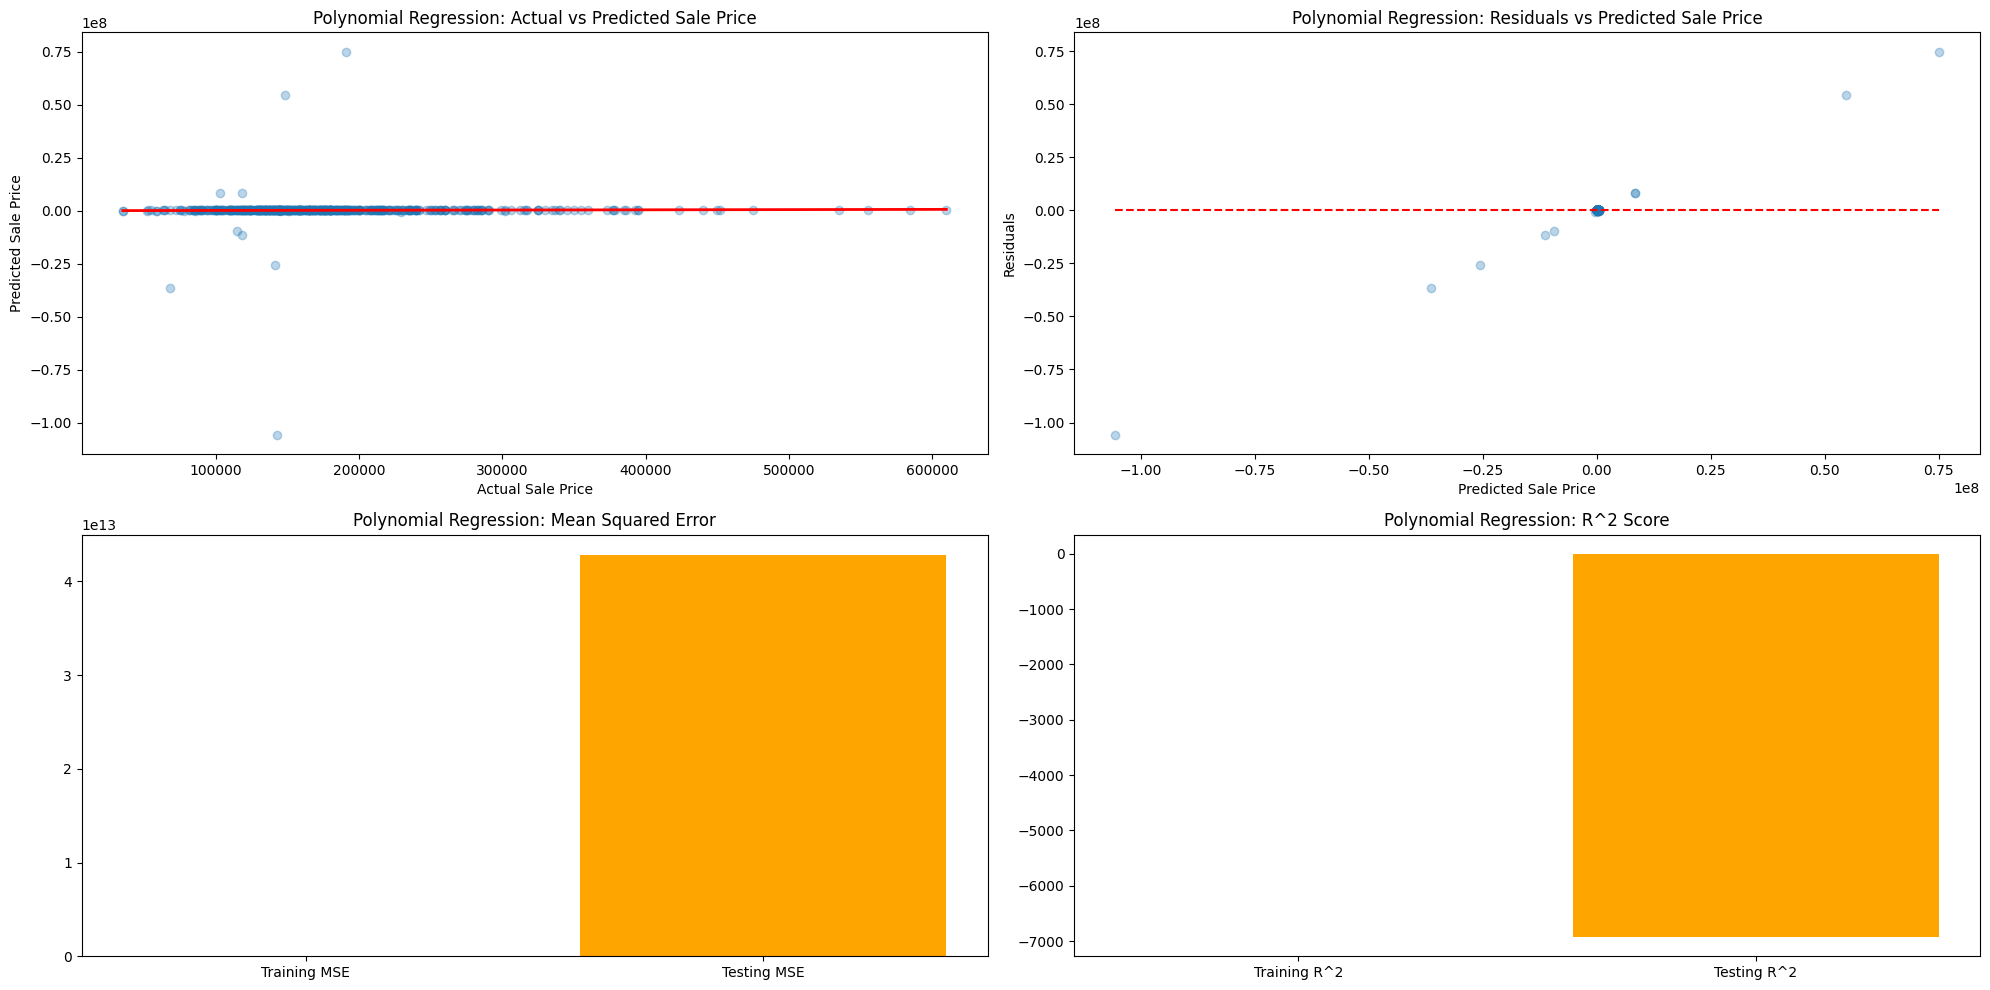

0.8611525570704108
-6928.263593725716


In [5]:
# Fit a polynomial regression model (degree 3)
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Calculate metrics
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred_poly, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Polynomial Regression: Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred_poly, y_test_pred_poly - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred_poly.min(), xmax=y_test_pred_poly.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Polynomial Regression: Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values_poly = [mse_train_poly, mse_test_poly]
mse_labels_poly = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels_poly, mse_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values_poly = [r2_train_poly, r2_test_poly]
r2_labels_poly = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels_poly, r2_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: R^2 Score')

plt.tight_layout()
plt.show()

print(r2_train_poly)
print(r2_test_poly)

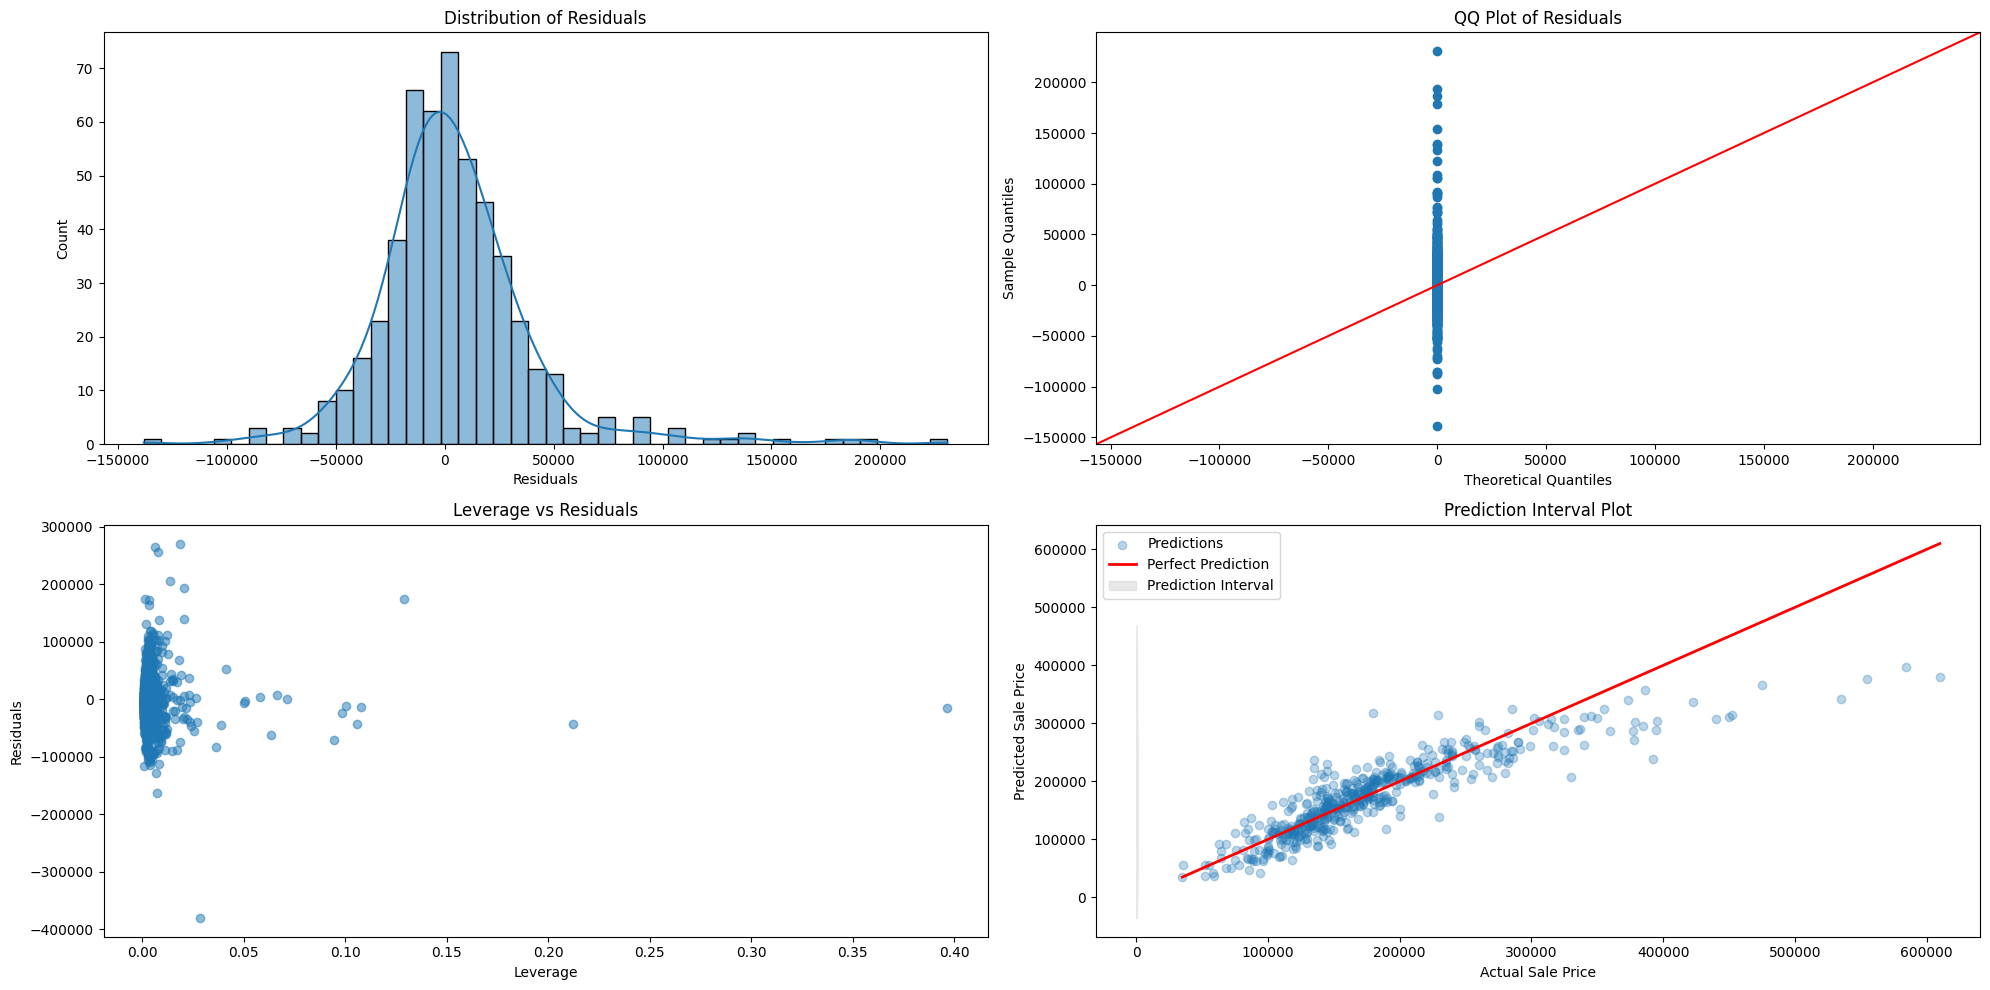

In [10]:
import statsmodels.api as sm
import numpy as np

# Residuals
residuals = y_test - y_test_pred

# Leverage values for training data
model_with_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, model_with_const).fit()
influence = ols_model.get_influence()
leverage_train = influence.hat_matrix_diag[:len(y_train)]
residuals_train = y_train - y_train_pred

plt.figure(figsize=(20, 10))

# Distribution of Residuals
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

# QQ Plot
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='45', ax=plt.gca())
plt.title('QQ Plot of Residuals')

# Leverage vs Residuals
plt.subplot(2, 2, 3)
plt.scatter(leverage_train, residuals_train, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Leverage vs Residuals')

# Prediction Interval Plot
plt.subplot(2, 2, 4)
preds_interval = np.array([y_test_pred - 1.96 * np.std(residuals), y_test_pred + 1.96 * np.std(residuals)])
plt.scatter(y_test, y_test_pred, alpha=0.3, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.fill_between(np.arange(len(y_test)), preds_interval[0], preds_interval[1], color='lightgrey', alpha=0.5, label='Prediction Interval')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Prediction Interval Plot')
plt.legend()

plt.tight_layout()
plt.show()


/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_7140/4183509457.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')


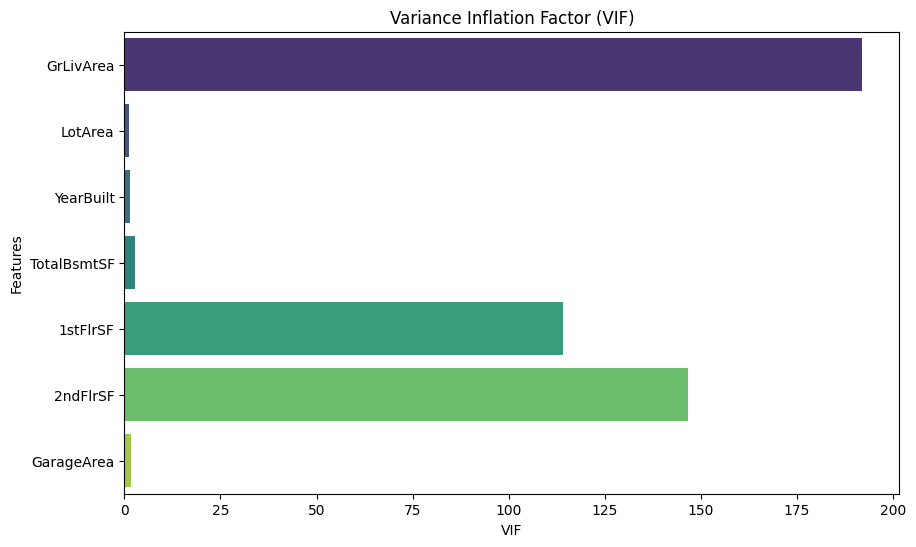

Feature         VIF
0    GrLivArea  192.036309
1      LotArea    1.157193
2    YearBuilt    1.403417
3  TotalBsmtSF    2.706926
4     1stFlrSF  114.071186
5     2ndFlrSF  146.576640
6   GarageArea    1.633075

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i+1) for i in range(len(X_train.columns))]

# Plot VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()

vif_data

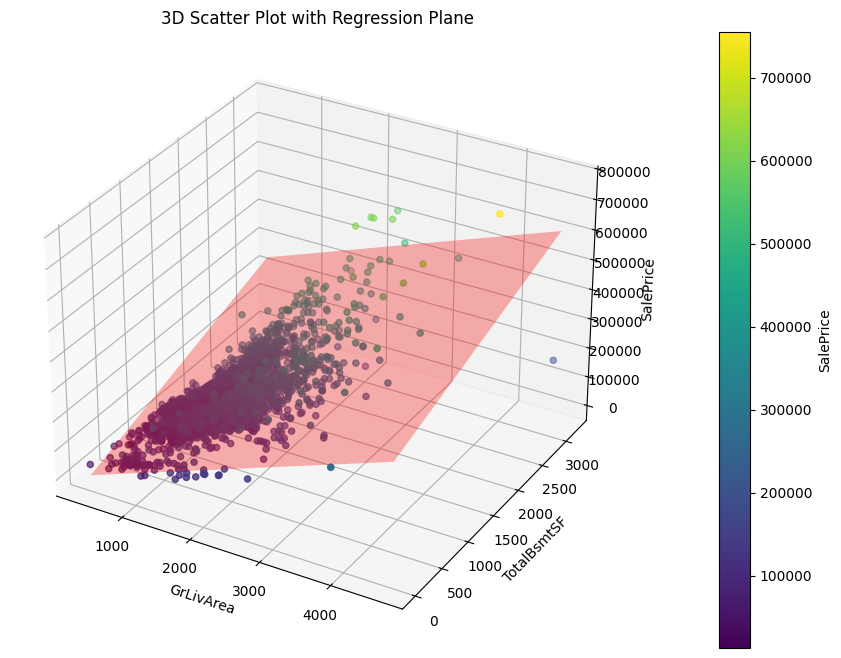

In [15]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Ensuring the correct dataframe and column names are used
house_price_data_clean_renamed = house_price_data_clean.rename(columns={
    '1stFlrSF': 'FirstFlrSF',
    '2ndFlrSF': 'SecondFlrSF'
})

# Update variable names to match renamed columns
x_var = 'GrLivArea'
y_var = 'TotalBsmtSF'
z_var = 'SalePrice'

# Fit a 3D linear regression model
X_3d = house_price_data_clean_renamed[[x_var, y_var]]
X_3d = sm.add_constant(X_3d)  # Add a constant term for the intercept
y_3d = house_price_data_clean_renamed[z_var]
model_3d = sm.OLS(y_3d, X_3d).fit()

# Create a grid of values for the independent variables
x_surf, y_surf = np.meshgrid(np.linspace(X_3d[x_var].min(), X_3d[x_var].max(), 100),
                             np.linspace(X_3d[y_var].min(), X_3d[y_var].max(), 100))

# Predict values for the grid
exog = pd.DataFrame({x_var: x_surf.ravel(), y_var: y_surf.ravel()})
exog = sm.add_constant(exog)
fittedY = model_3d.predict(exog).values.reshape(x_surf.shape)

# Plot the 3D scatter plot with the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(house_price_data_clean_renamed[x_var], house_price_data_clean_renamed[y_var], house_price_data_clean_renamed[z_var], c=house_price_data_clean_renamed[z_var], cmap='viridis', marker='o')

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, rstride=100, cstride=100)

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('3D Scatter Plot with Regression Plane')

# Adding a color bar to indicate SalePrice
color_bar = plt.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('SalePrice')

plt.show()


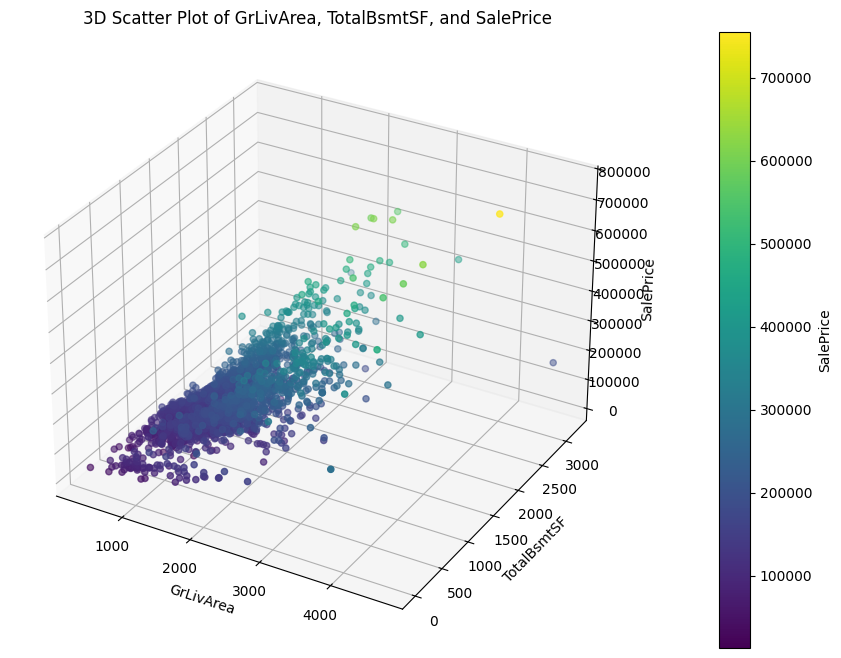

In [16]:
# Create 3D scatter plot without the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(house_price_data_clean_renamed[x_var], house_price_data_clean_renamed[y_var], house_price_data_clean_renamed[z_var], c=house_price_data_clean_renamed[z_var], cmap='viridis', marker='o')

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('3D Scatter Plot of GrLivArea, TotalBsmtSF, and SalePrice')

# Adding a color bar to indicate SalePrice
color_bar = plt.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('SalePrice')

plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Identify numeric columns
numeric_cols = house_price_data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix using only numeric columns
corr_matrix = house_price_data[numeric_cols].corr()

# Select features with high correlation to the target variable (SalePrice)
high_corr_features = corr_matrix.index[corr_matrix['SalePrice'].abs() > 0.5].tolist()
high_corr_features.remove('SalePrice')  # Remove the target variable itself

# Subset the data with the selected high correlation features
features_high_corr = house_price_data[high_corr_features]
target = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_high_corr_encoded = pd.get_dummies(features_high_corr, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_high_corr_imputed = imputer.fit_transform(features_high_corr_encoded)

# Define the linear regression model
lr_model = LinearRegression()

# Define the forward selection feature selector
sfs_forward_high_corr = SequentialFeatureSelector(lr_model, direction='forward', n_features_to_select='auto')

# Fit the feature selector
sfs_forward_high_corr.fit(features_high_corr_imputed, target)

# Get the selected features
selected_features_forward_high_corr = features_high_corr_encoded.columns[sfs_forward_high_corr.get_support()]

selected_features_forward_high_corr



Index(['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageArea'], dtype='object')

/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_7140/948886148.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


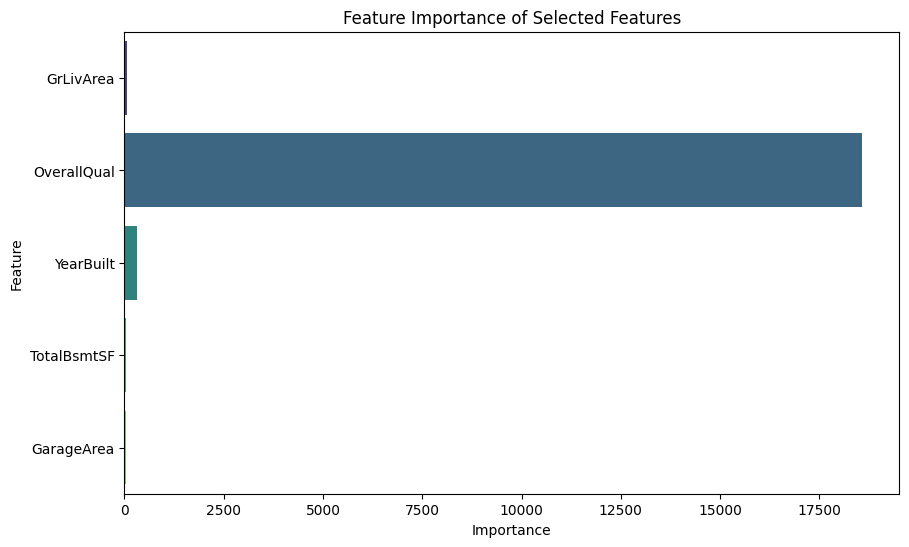

In [23]:
import seaborn as sns
# Fit the linear regression model on the selected features
selected_features_data = features_high_corr_encoded[selected_features_forward_high_corr]
model = LinearRegression()
# Fit the linear regression model on the selected features after handling missing values
selected_features_data_imputed = imputer.fit_transform(selected_features_data)
model.fit(selected_features_data_imputed, target)

# Get the coefficients
coefficients = model.coef_

# Create a DataFrame for the feature importance
feature_importance = pd.DataFrame({'Feature': selected_features_forward_high_corr, 'Importance': coefficients})

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance of Selected Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_data_imputed, target, test_size=0.2, random_state=42)

# Train the linear regression model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1228464786.2957406, 0.8003044188963836)

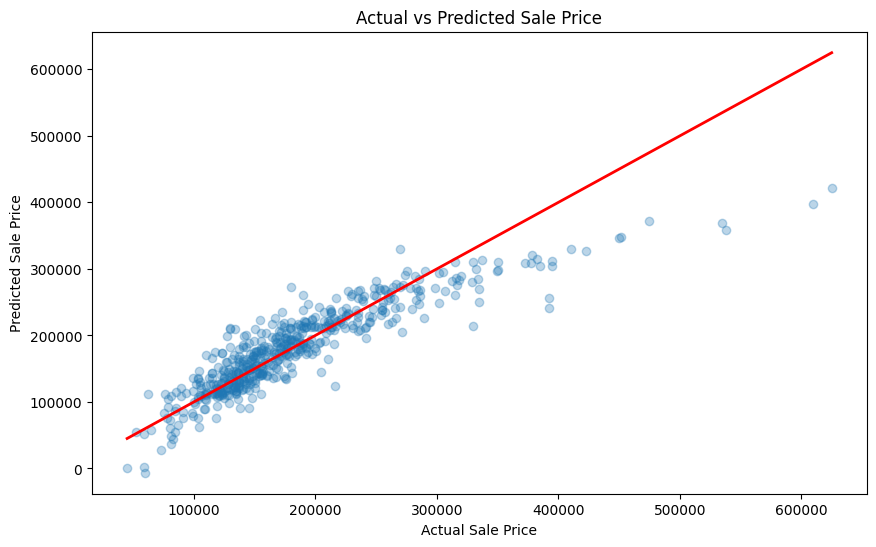

In [25]:
# Plotting the model predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

In [27]:
# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Train the linear regression model on the full dataset
model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_all = model.predict(X_test_all)

# Calculate performance metrics
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

mse_all, r2_all


(534366722.1515574, 0.9131349353331806)

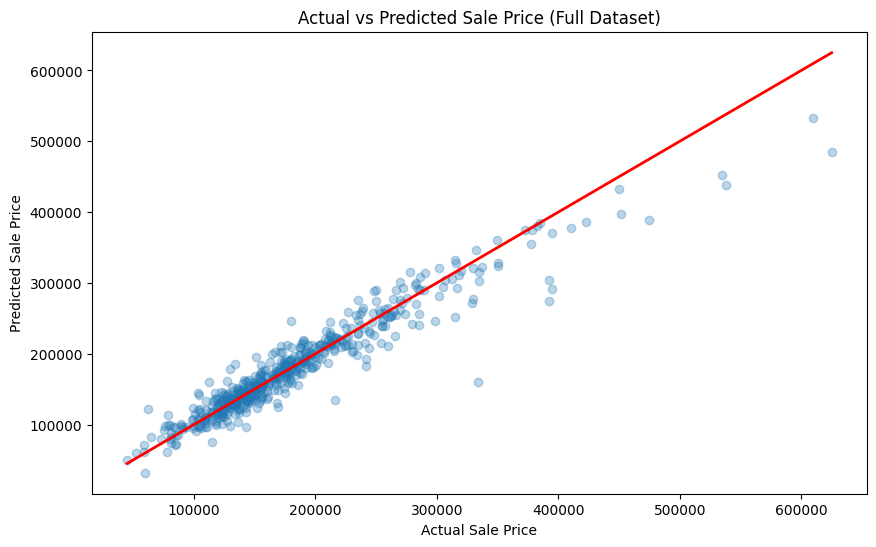

In [28]:
# Plotting the model predictions vs actual values for the full dataset model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_all, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Full Dataset)')
plt.show()

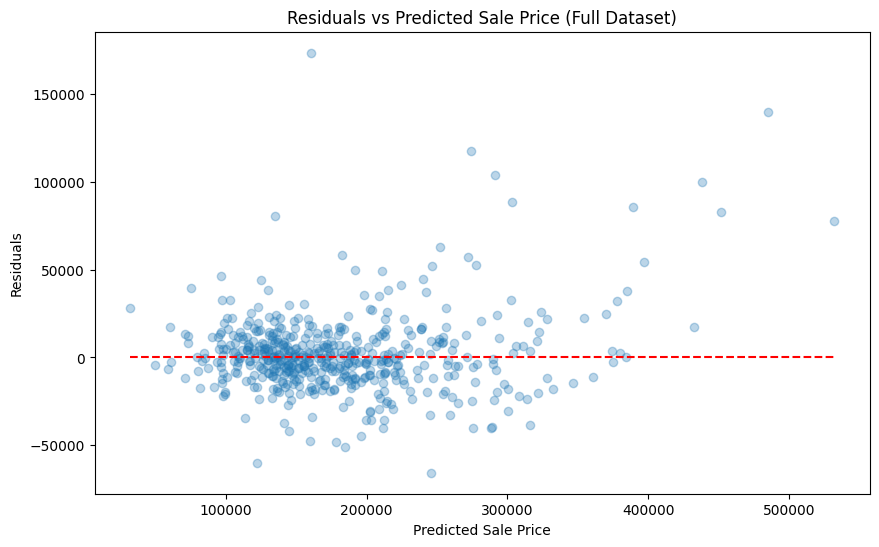

In [29]:
# Calculate the residuals
residuals = y_test_all - y_pred_all

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_all, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_all.min(), xmax=y_pred_all.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Full Dataset)')
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Define the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# Train the models on the full dataset
linear_model.fit(X_train_all, y_train_all)
random_forest_model.fit(X_train_all, y_train_all)
svr_model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test_all)
y_pred_rf = random_forest_model.predict(X_test_all)
y_pred_svr = svr_model.predict(X_test_all)

# Calculate performance metrics
mse_linear = mean_squared_error(y_test_all, y_pred_linear)
r2_linear = r2_score(y_test_all, y_pred_linear)
mae_linear = mean_absolute_error(y_test_all, y_pred_linear)

mse_rf = mean_squared_error(y_test_all, y_pred_rf)
r2_rf = r2_score(y_test_all, y_pred_rf)
mae_rf = mean_absolute_error(y_test_all, y_pred_rf)

mse_svr = mean_squared_error(y_test_all, y_pred_svr)
r2_svr = r2_score(y_test_all, y_pred_svr)
mae_svr = mean_absolute_error(y_test_all, y_pred_svr)

performance_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Regression'],
    'MSE': [mse_linear, mse_rf, mse_svr],
    'R^2': [r2_linear, r2_rf, r2_svr],
    'MAE': [mae_linear, mae_rf, mae_svr]
})

print(performance_comparison)


                       Model           MSE       R^2           MAE
0          Linear Regression  5.343667e+08  0.913135  14712.850884
1              Random Forest  6.514445e+08  0.894103  15963.918275
2  Support Vector Regression  6.725165e+09 -0.093223  55020.103473


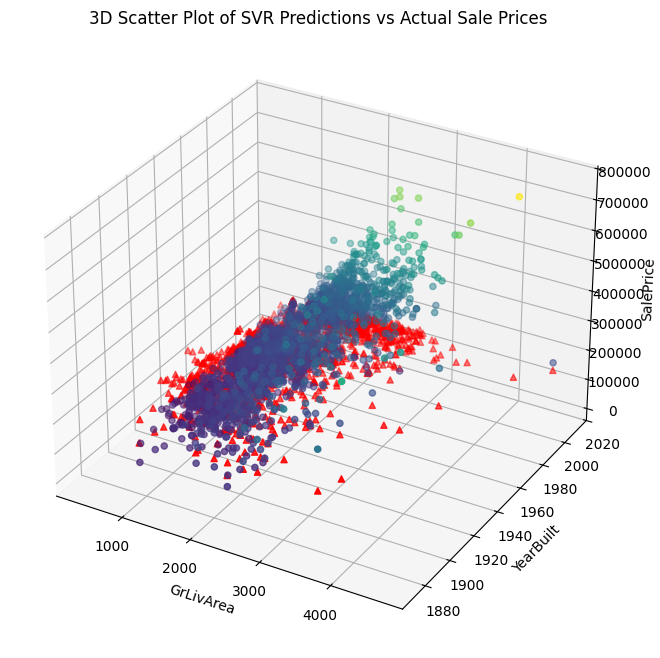

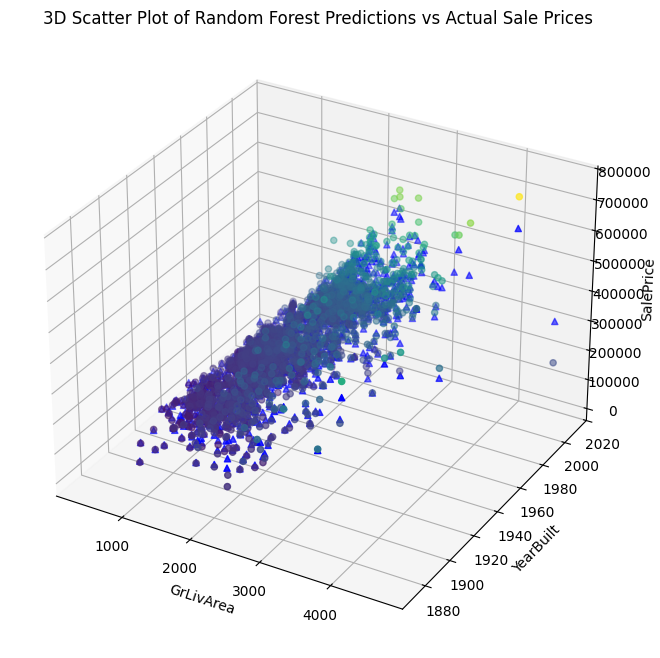

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Define the models
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# Train the models on the full dataset
random_forest_model.fit(X_train_all, y_train_all)
svr_model.fit(X_train_all, y_train_all)

# Select three features to visualize their interaction in 3D
x_feature = 'GrLivArea'
y_feature = 'YearBuilt'
z_feature = 'SalePrice'

# Subset the data for visualization
subset_data = house_price_data[[x_feature, y_feature, z_feature]].dropna()

# Encode and impute the subset data
subset_data_encoded = pd.get_dummies(subset_data.drop(columns=z_feature), drop_first=True)
subset_data_imputed = imputer.transform(subset_data_encoded)

# SVR predictions on subset data
y_pred_svr_subset = svr_model.predict(subset_data_imputed)

# Create a 3D scatter plot for SVR
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(subset_data[x_feature], subset_data[y_feature], subset_data[z_feature], c=subset_data[z_feature], cmap='viridis', marker='o')
ax.scatter(subset_data[x_feature], subset_data[y_feature], y_pred_svr_subset, c='r', marker='^')

ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('3D Scatter Plot of SVR Predictions vs Actual Sale Prices')

plt.show()

# Random Forest predictions on subset data
y_pred_rf_subset = random_forest_model.predict(subset_data_imputed)

# Create a 3D scatter plot for Random Forest
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(subset_data[x_feature], subset_data[y_feature], subset_data[z_feature], c=subset_data[z_feature], cmap='viridis', marker='o')
ax.scatter(subset_data[x_feature], subset_data[y_feature], y_pred_rf_subset, c='b', marker='^')

ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('3D Scatter Plot of Random Forest Predictions vs Actual Sale Prices')

plt.show()


/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_7140/1522837782.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


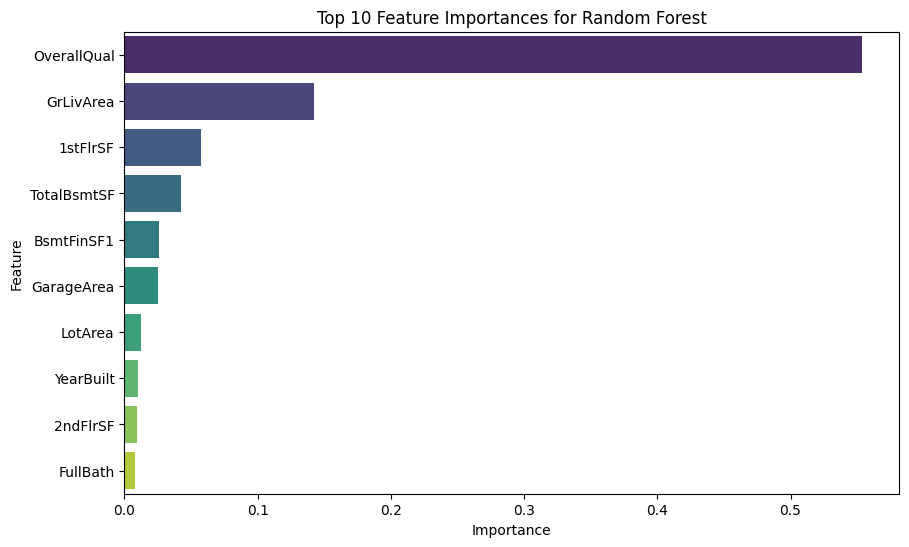

In [40]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Define the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the full dataset
random_forest_model.fit(features_all_original_imputed, target_original)

# Get the feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features_all_original_encoded.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)  # Display top 10 features for clarity

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 10 Feature Importances for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


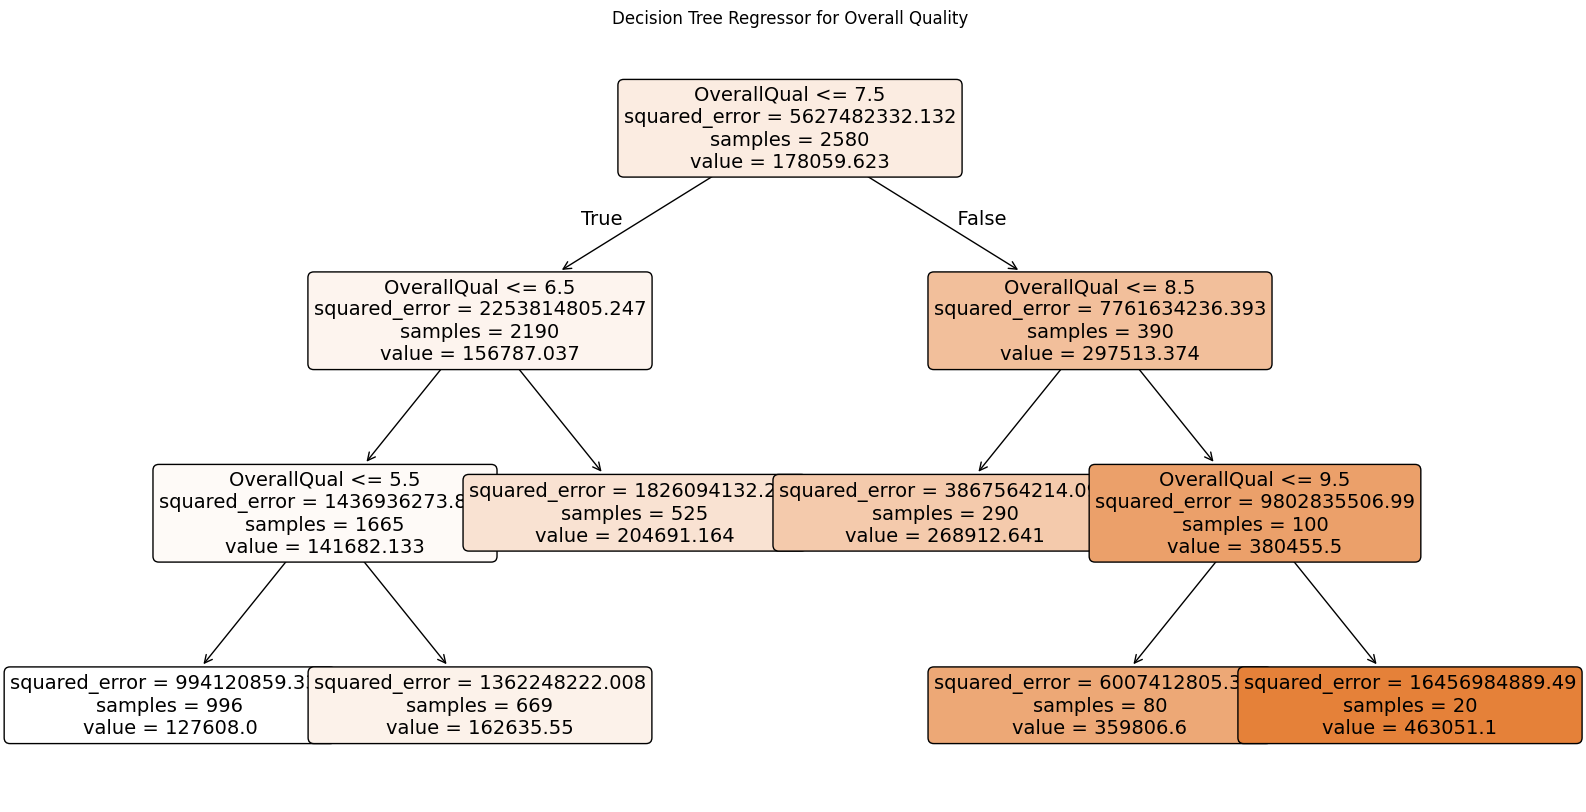

In [36]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Fit a Decision Tree model on the 'OverallQual' feature
X_overall_qual = house_price_data[['OverallQual']]
y = house_price_data['SalePrice']

# Initialize and fit the Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_overall_qual, y)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=['OverallQual'], filled=True, rounded=True, fontsize=14)
plt.title('Decision Tree Regressor for Overall Quality')
plt.show()


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


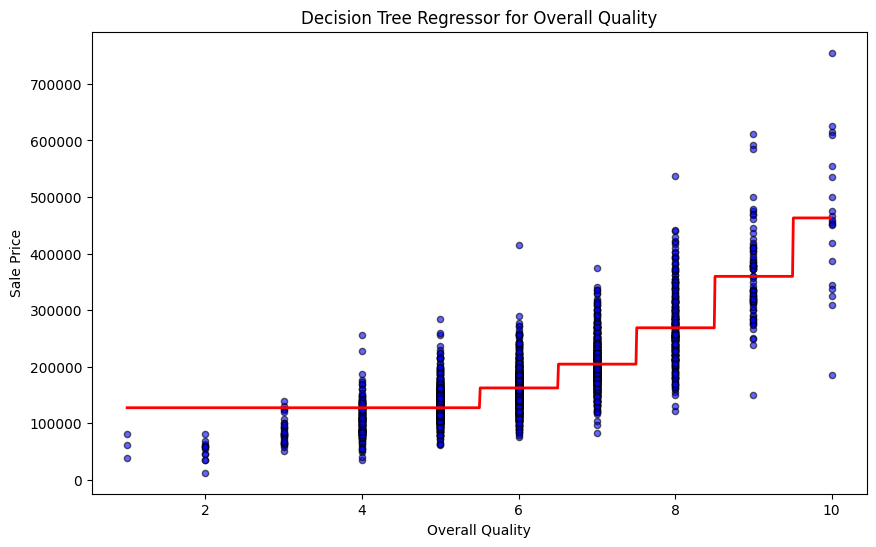

In [39]:
# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Prepare data for plotting
X = house_price_data[['OverallQual']]
y = house_price_data['SalePrice']

# Fit the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Generate a grid of values for OverallQual
qual_grid = np.arange(X['OverallQual'].min(), X['OverallQual'].max(), 0.01).reshape(-1, 1)
price_pred = tree_model.predict(qual_grid)

# Plot the tree decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=20, edgecolor='k', alpha=0.6)
plt.plot(qual_grid, price_pred, color='red', linewidth=2)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regressor for Overall Quality')
plt.show()


MSE: 576123205.3264941
R^2: 0.9063471555709839


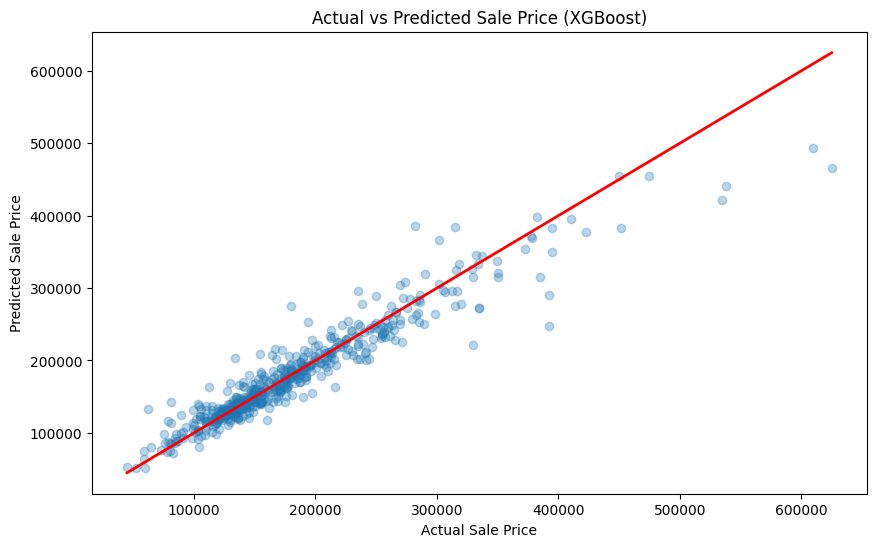

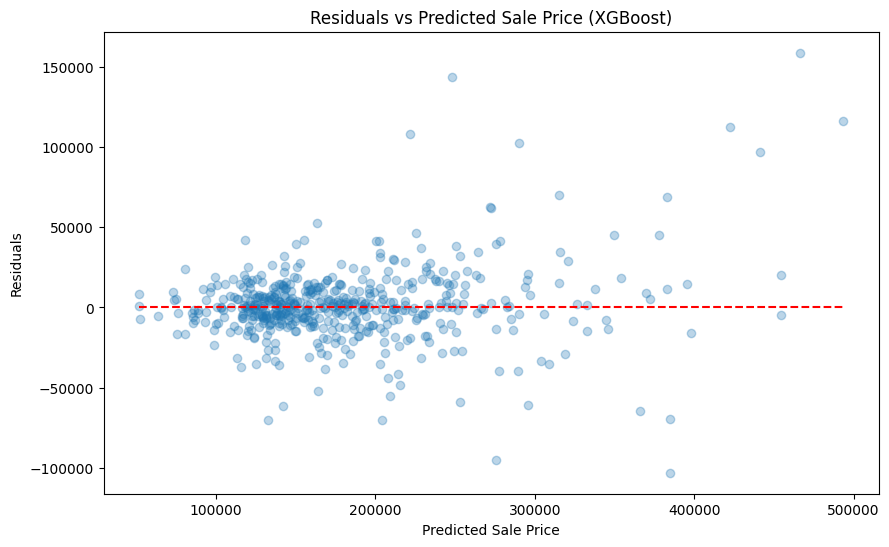

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgboost_model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_xgb = xgboost_model.predict(X_test_all)

# Calculate performance metrics
mse_xgb = mean_squared_error(y_test_all, y_pred_xgb)
r2_xgb = r2_score(y_test_all, y_pred_xgb)

print(f'MSE: {mse_xgb}')
print(f'R^2: {r2_xgb}')

# Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_xgb, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (XGBoost)')
plt.show()

# Plot residuals
residuals = y_test_all - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_xgb.min(), xmax=y_pred_xgb.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (XGBoost)')
plt.show()


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.3296e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.481e+11, tolerance: 1.133e+09
  model = cd_fast.enet_coordinate_descent(


Ridge Regression - MSE: 498440093.66111743, R^2: 0.9189750611825551
Lasso Regression - MSE: 528943590.22971857, R^2: 0.914016503525134


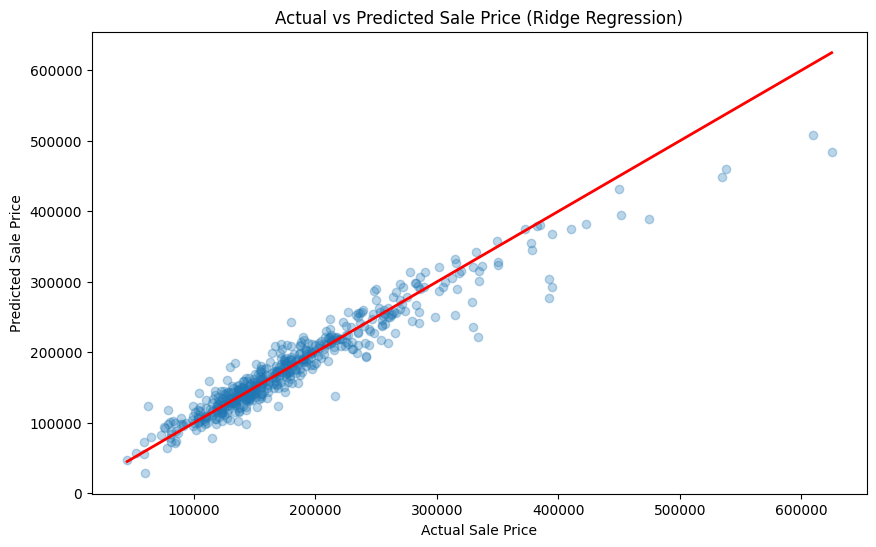

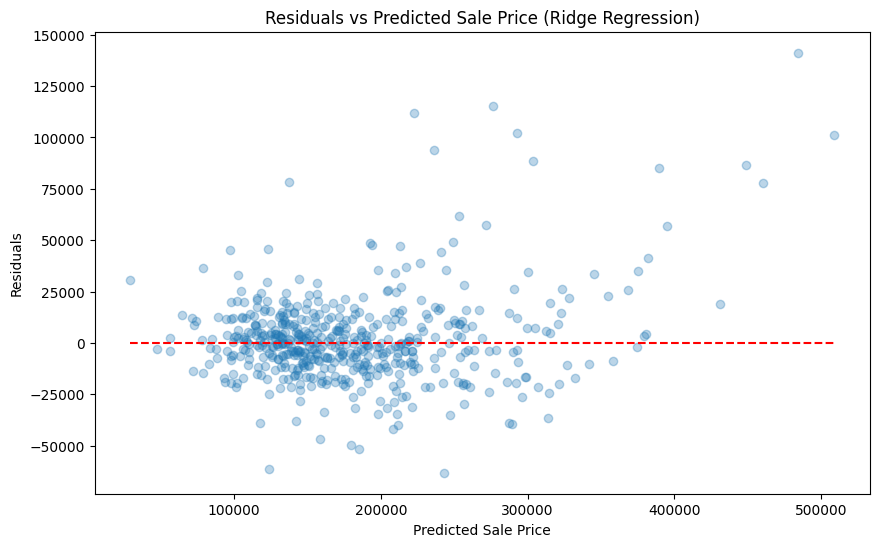

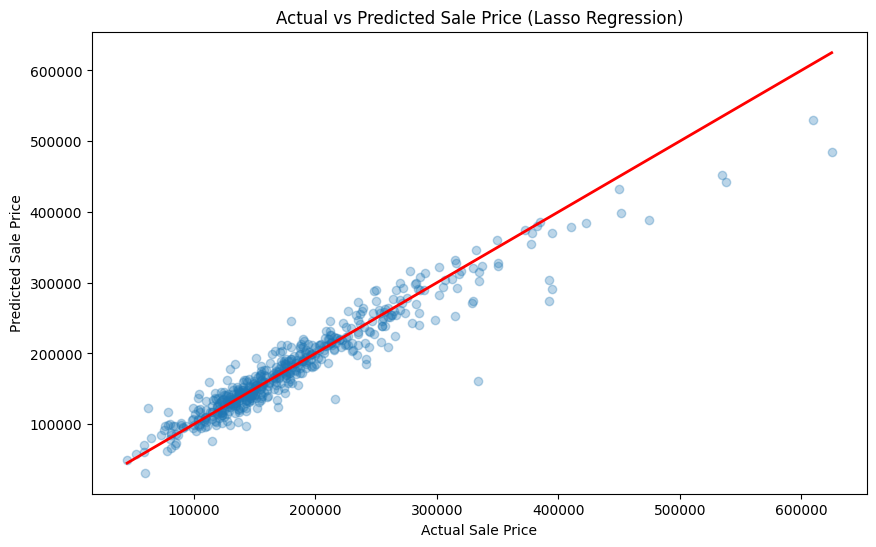

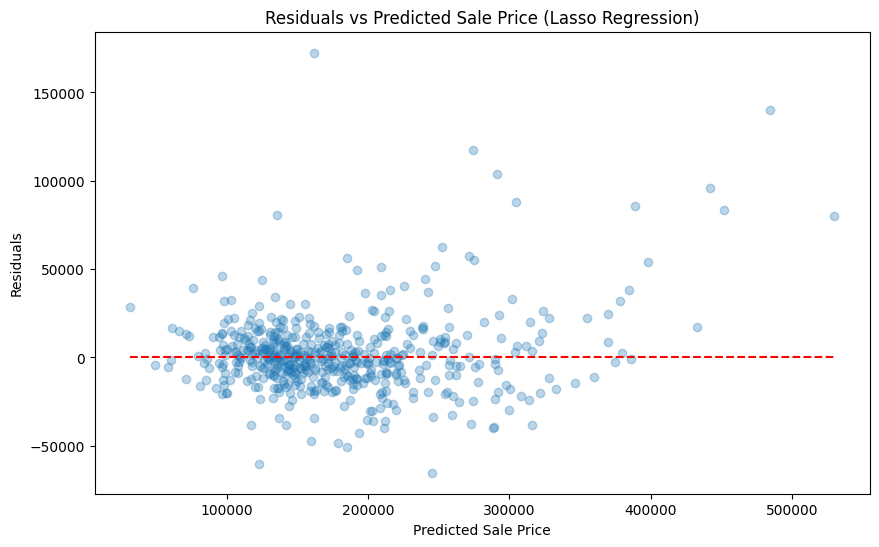

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regressor
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_all, y_train_all)

# Make predictions on the test set for Ridge
y_pred_ridge = ridge_model.predict(X_test_all)

# Calculate performance metrics for Ridge
mse_ridge = mean_squared_error(y_test_all, y_pred_ridge)
r2_ridge = r2_score(y_test_all, y_pred_ridge)

print(f'Ridge Regression - MSE: {mse_ridge}, R^2: {r2_ridge}')

# Initialize and fit the Lasso regressor
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_all, y_train_all)

# Make predictions on the test set for Lasso
y_pred_lasso = lasso_model.predict(X_test_all)

# Calculate performance metrics for Lasso
mse_lasso = mean_squared_error(y_test_all, y_pred_lasso)
r2_lasso = r2_score(y_test_all, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}, R^2: {r2_lasso}')

# Plot actual vs predicted sale prices for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_ridge, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Ridge Regression)')
plt.show()

# Plot residuals for Ridge
residuals_ridge = y_test_all - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_ridge.min(), xmax=y_pred_ridge.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Ridge Regression)')
plt.show()

# Plot actual vs predicted sale prices for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_lasso, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Lasso Regression)')
plt.show()

# Plot residuals for Lasso
residuals_lasso = y_test_all - y_pred_lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_lasso.min(), xmax=y_pred_lasso.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Lasso Regression)')
plt.show()


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-06 16:43:58.094932: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-06 16:43:58.094956: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-06 16:43:58.095195: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-06 16:43:58.095218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-06 16:43:58.095235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


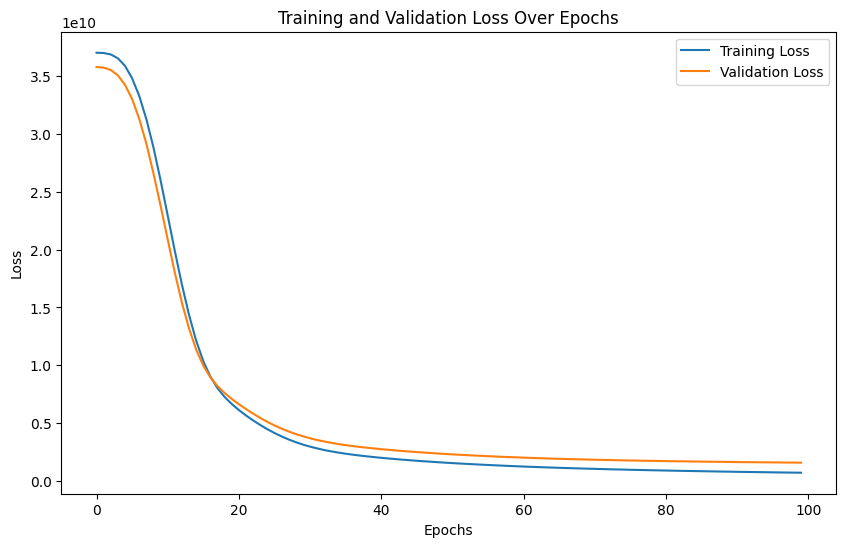

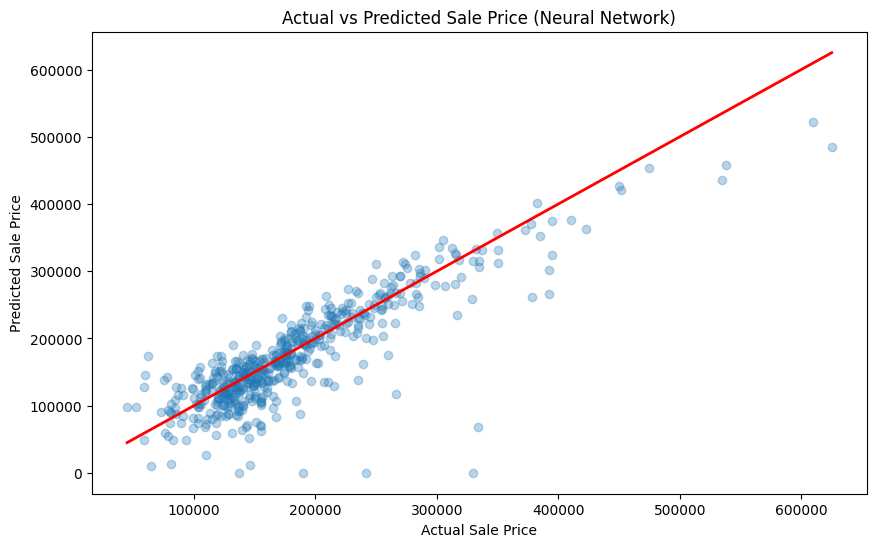

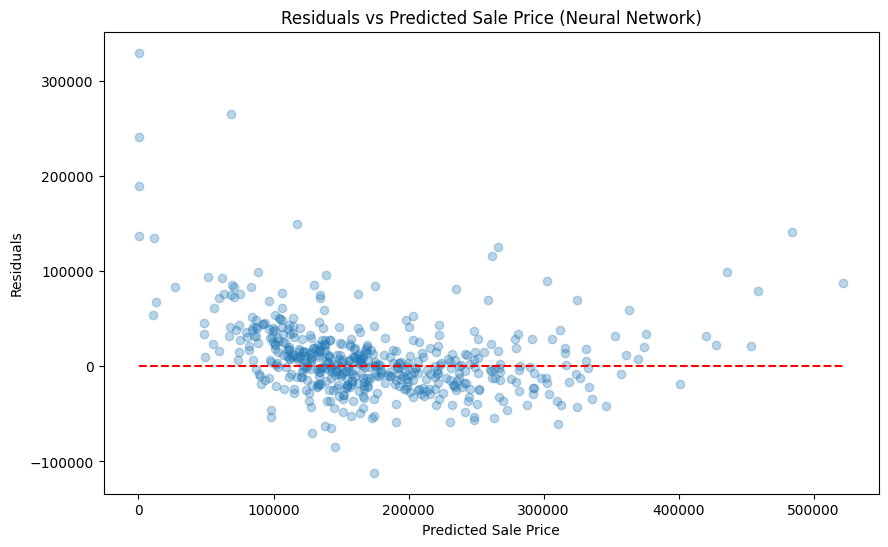

MSE: 1713326076.1697762
R^2: 0.7214868068695068


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Scale the features
scaler = StandardScaler()
features_all_scaled = scaler.fit_transform(features_all_original_imputed)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_scaled, target_original, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_all.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_all, y_train_all, epochs=100, validation_split=0.2, verbose=0)

# Make predictions on the test set
y_pred_nn = model.predict(X_test_all).flatten()

# Calculate performance metrics
mse_nn = mean_squared_error(y_test_all, y_pred_nn)
r2_nn = r2_score(y_test_all, y_pred_nn)

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_nn, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Neural Network)')
plt.show()

# Plot residuals
residuals_nn = y_test_all - y_pred_nn
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn, residuals_nn, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_nn.min(), xmax=y_pred_nn.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Neural Network)')
plt.show()

print(f'MSE: {mse_nn}')
print(f'R^2: {r2_nn}')


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Configuration 1: {'layers': [64, 64], 'activation': 'relu', 'optimizer': 'adam'}
MSE: 1592724073.0342815, R^2: 0.7410914897918701



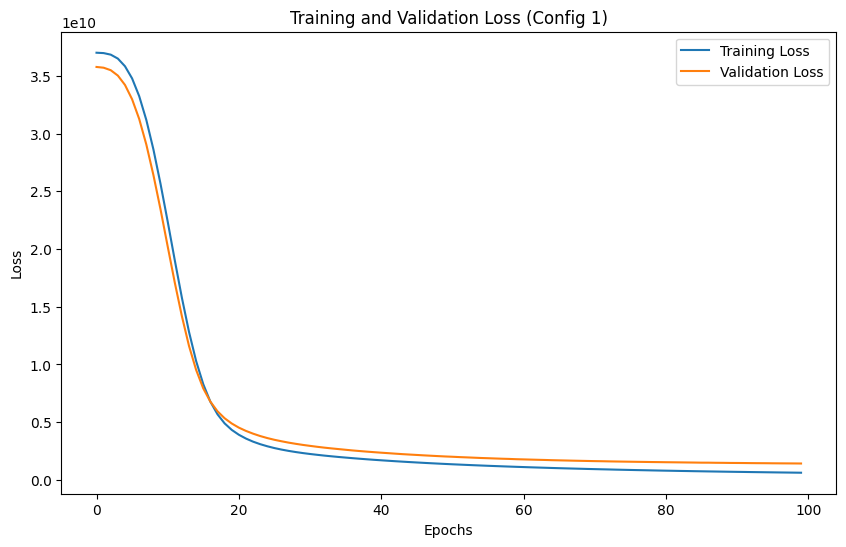

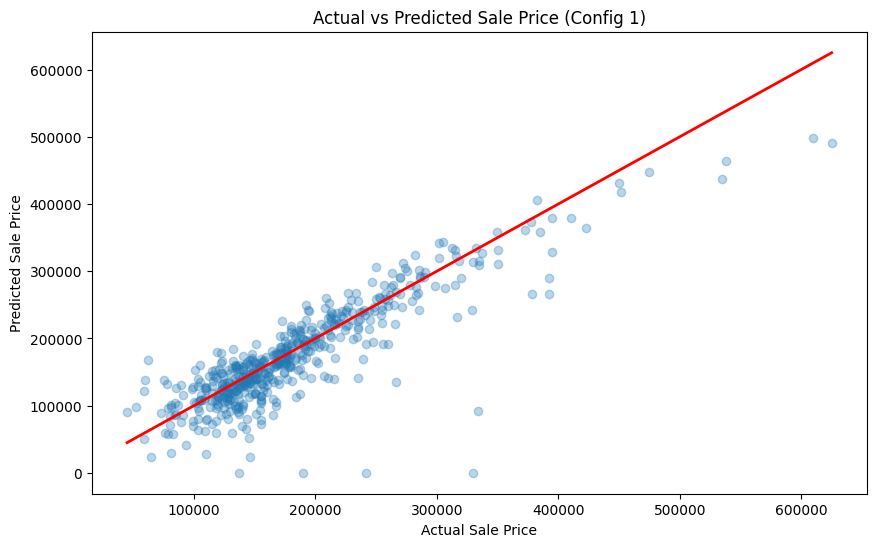

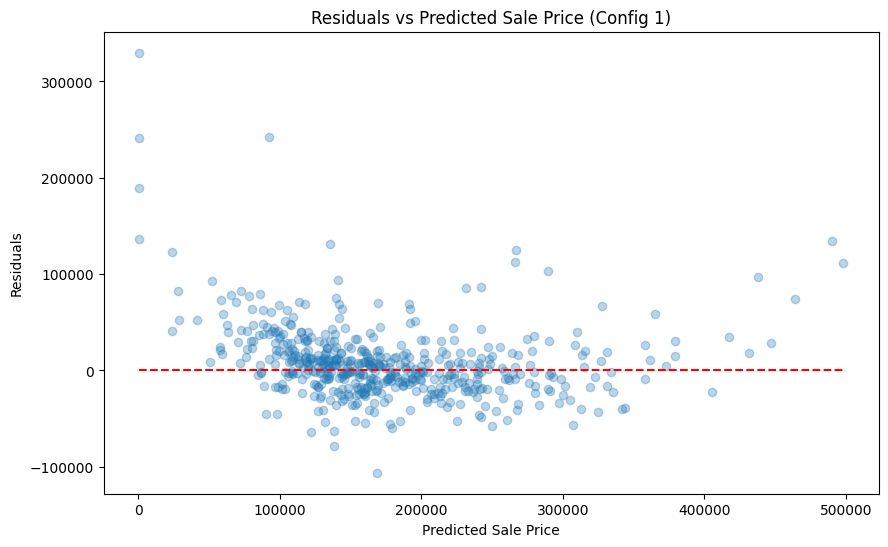

Configuration 2: {'layers': [128, 64, 32], 'activation': 'relu', 'optimizer': 'adam'}
MSE: 1224064504.0818994, R^2: 0.8010197281837463



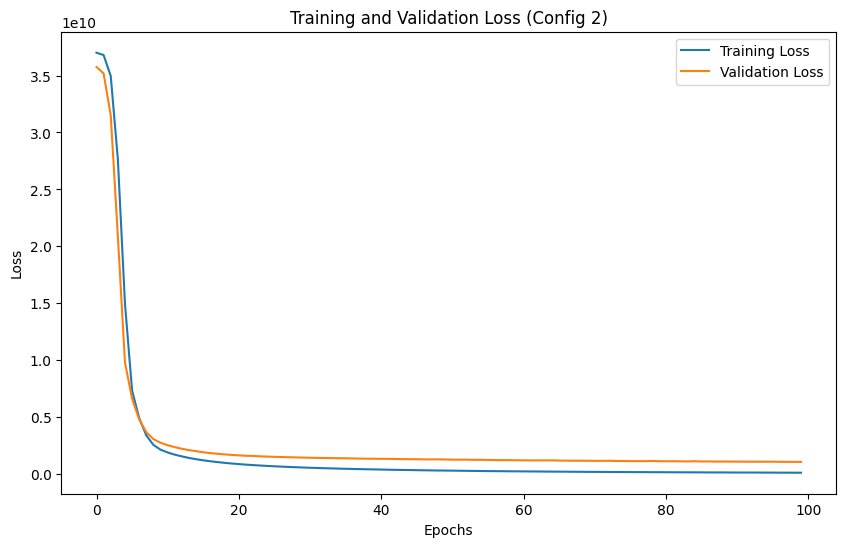

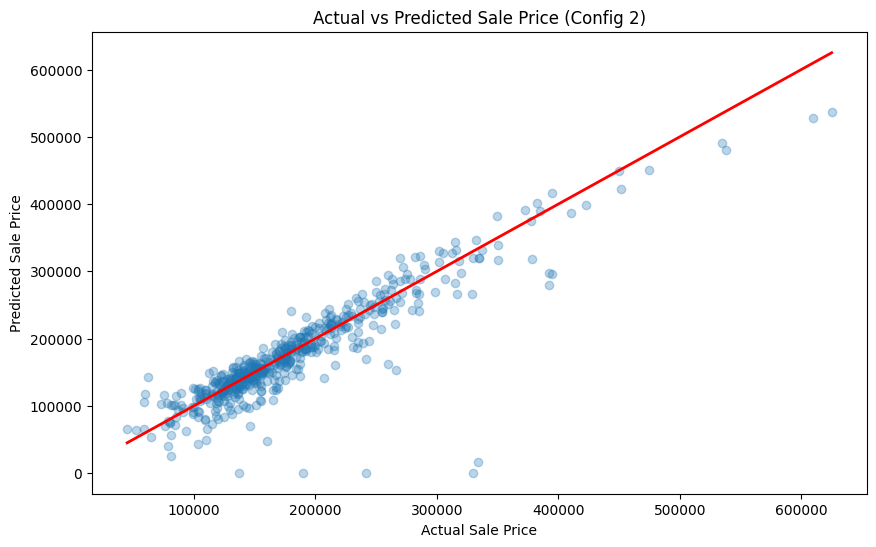

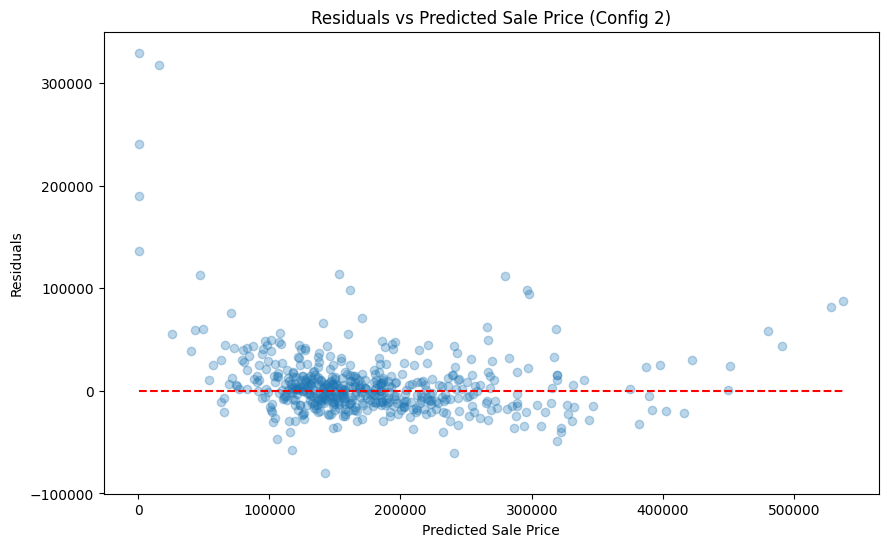

Configuration 3: {'layers': [64, 32, 32, 16], 'activation': 'relu', 'optimizer': 'adam'}
MSE: 1177125098.124338, R^2: 0.8086500763893127



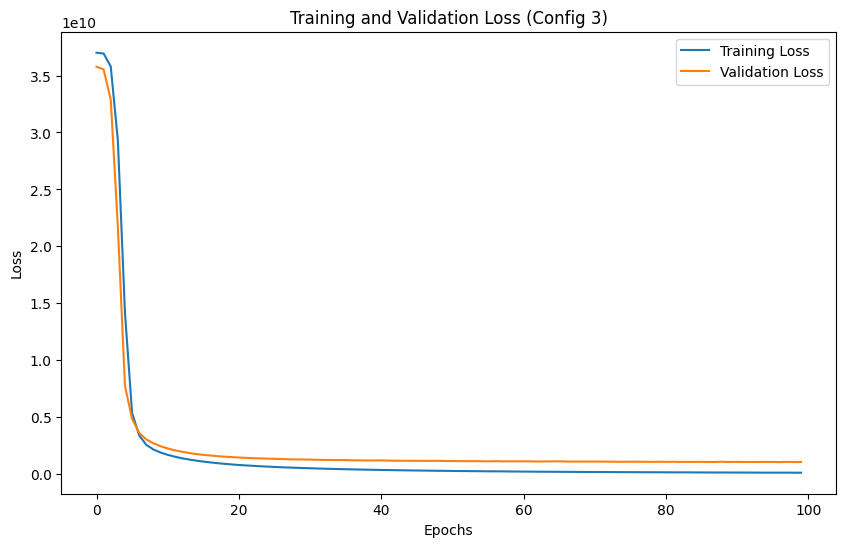

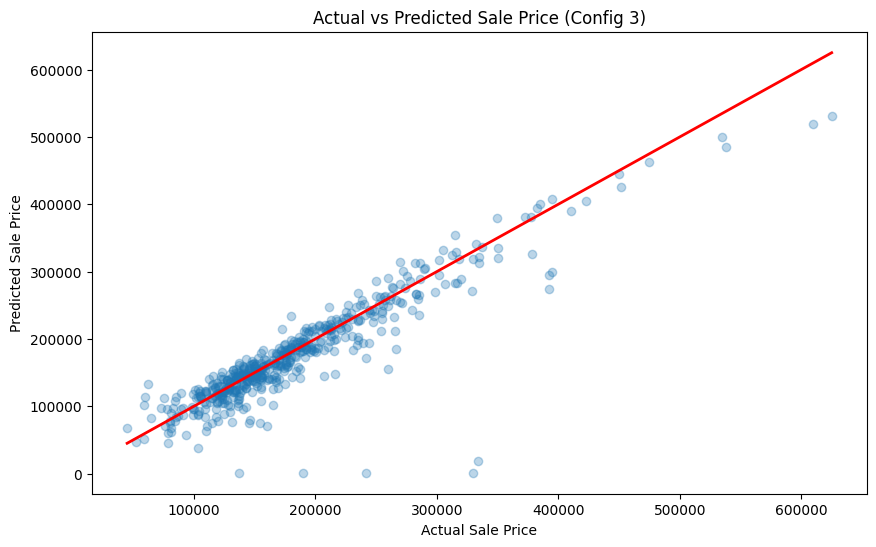

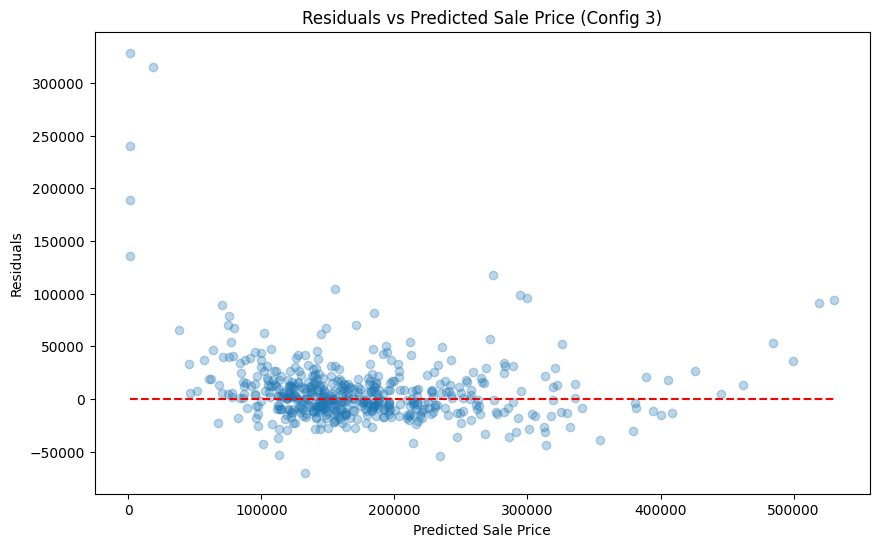

Configuration 4: {'layers': [64, 64], 'activation': 'tanh', 'optimizer': 'adam'}
MSE: 39488704575.59021, R^2: -5.419166564941406



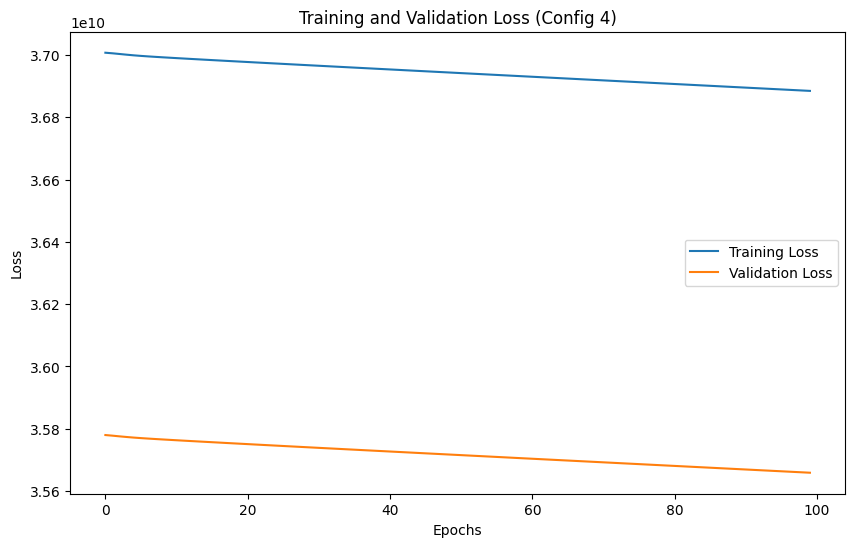

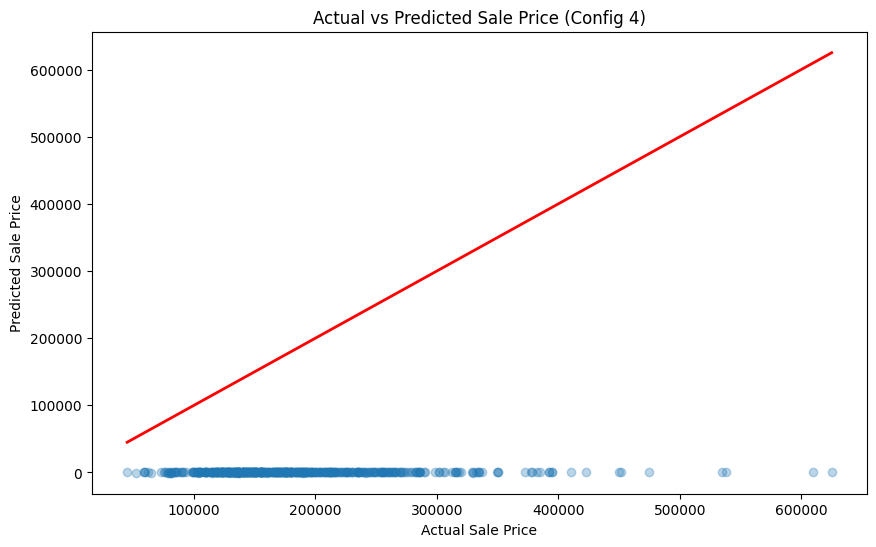

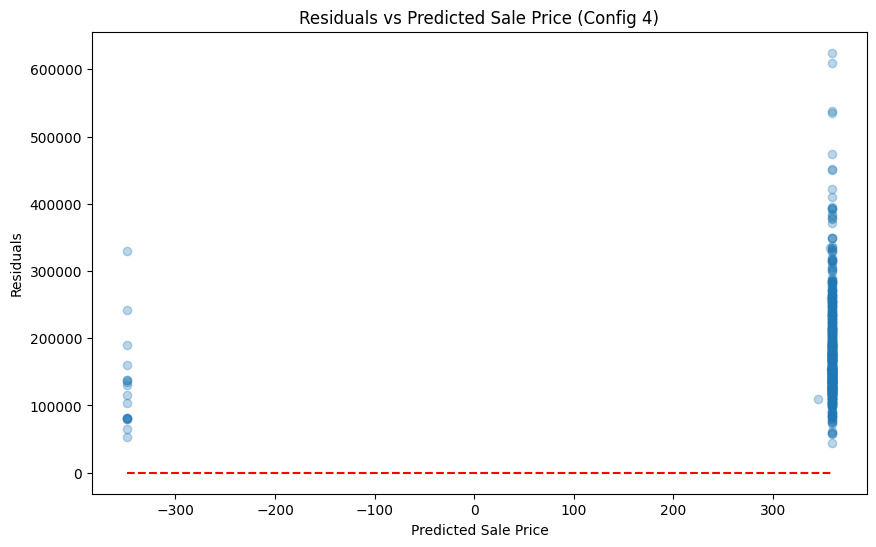

Configuration 5: {'layers': [64, 64], 'activation': 'relu', 'optimizer': 'sgd'}
MSE: 6182212522.727745, R^2: -0.0049620866775512695



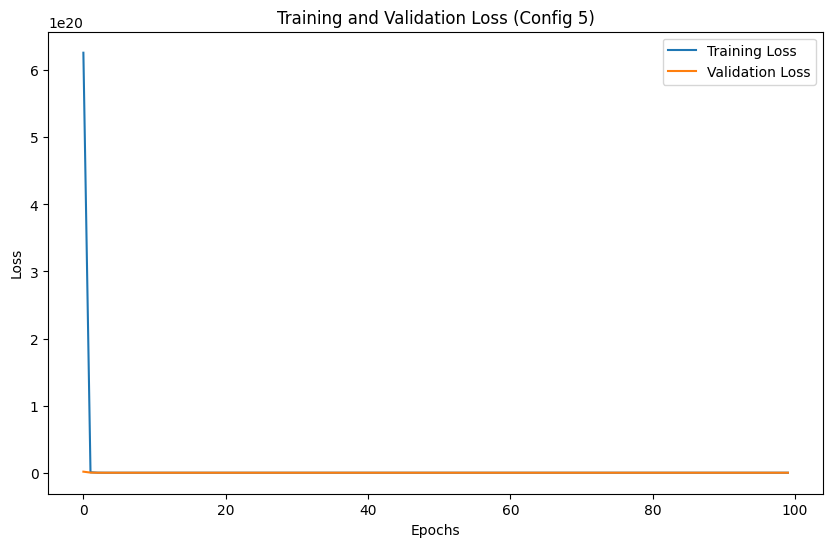

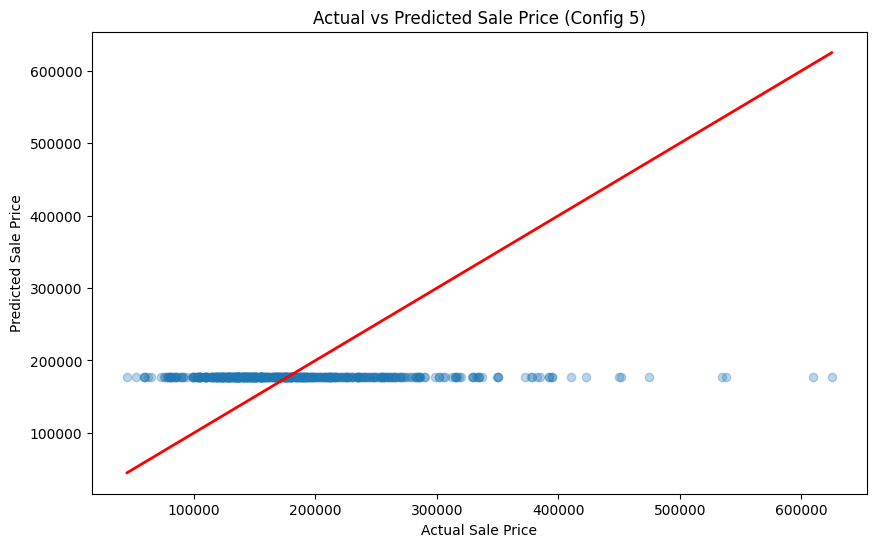

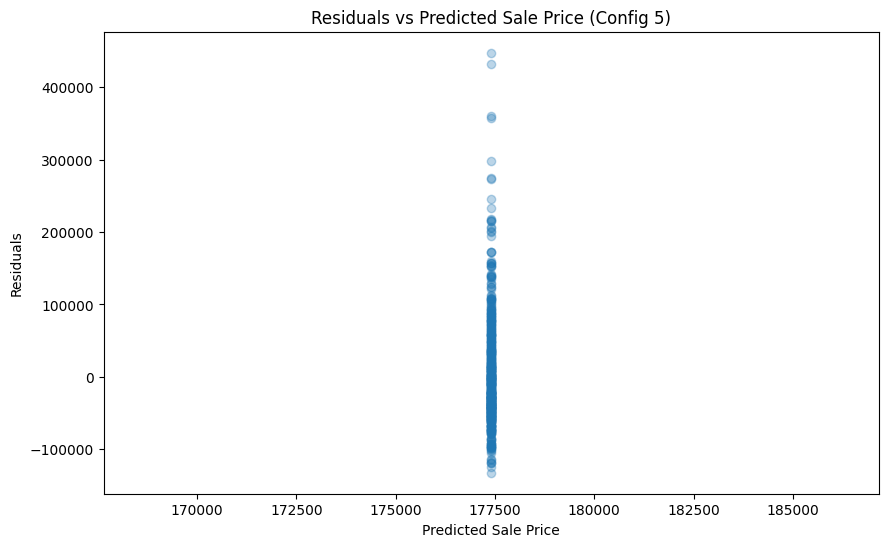

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Scale the features
scaler = StandardScaler()
features_all_scaled = scaler.fit_transform(features_all_original_imputed)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_scaled, target_original, test_size=0.2, random_state=42)

def build_and_train_model(layers, activation, optimizer, epochs=100):
    model = Sequential()
    model.add(Dense(layers[0], activation=activation, input_shape=(X_train_all.shape[1],)))
    
    for layer_size in layers[1:]:
        model.add(Dense(layer_size, activation=activation))
        
    model.add(Dense(1))
    
    model.compile(optimizer=optimizer, loss='mse')
    
    history = model.fit(X_train_all, y_train_all, epochs=epochs, validation_split=0.2, verbose=0)
    
    y_pred = model.predict(X_test_all).flatten()
    
    mse = mean_squared_error(y_test_all, y_pred)
    r2 = r2_score(y_test_all, y_pred)
    
    return history, mse, r2, y_pred

# Example configurations
configurations = [
    {'layers': [64, 64], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [128, 64, 32], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [64, 32, 32, 16], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [64, 64], 'activation': 'tanh', 'optimizer': 'adam'},
    {'layers': [64, 64], 'activation': 'relu', 'optimizer': 'sgd'}
]

results = []

for config in configurations:
    history, mse, r2, y_pred = build_and_train_model(**config)
    results.append((config, history, mse, r2, y_pred))

# Plot the results
for i, (config, history, mse, r2, y_pred) in enumerate(results):
    print(f"Configuration {i+1}: {config}")
    print(f"MSE: {mse}, R^2: {r2}\n")
    
    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss (Config {i+1})')
    plt.legend()
    plt.show()
    
    # Plot actual vs predicted sale prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_all, y_pred, alpha=0.3)
    plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(f'Actual vs Predicted Sale Price (Config {i+1})')
    plt.show()
    
    # Plot residuals
    residuals = y_test_all - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Sale Price (Config {i+1})')
    plt.show()


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers import Adam
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define a function to build the model with different hyperparameters
def build_model(n_layers, n_neurons, learning_rate, activation):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Hyperparameters to try
n_layers_options = [2, 3]
n_neurons_options = [32, 64, 128]
learning_rate_options = [0.001, 0.01]
activation_options = ['relu', 'tanh']

# Track the best model and its parameters
best_r2 = -np.inf
best_params = {}

# Perform the grid search
for n_layers in n_layers_options:
    for n_neurons in n_neurons_options:
        for learning_rate in learning_rate_options:
            for activation in activation_options:
                print(f'Training model with {n_layers} layers, {n_neurons} neurons, learning rate {learning_rate}, activation {activation}')
                model = build_model(n_layers, n_neurons, learning_rate, activation)
                history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                print(f'R^2 Score: {r2}')
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {
                        'n_layers': n_layers,
                        'n_neurons': n_neurons,
                        'learning_rate': learning_rate,
                        'activation': activation
                    }

print(f'Best R^2 Score: {best_r2}')
print(f'Best parameters: {best_params}')

# Train the best model again with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_neurons'], best_params['learning_rate'], best_params['activation'])
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)
test_loss, test_mae = best_model.evaluate(X_test, y_test)
y_pred = best_model.predict(X_test)
best_r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Best R^2 Score: {best_r2}')

Training model with 2 layers, 32 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R^2 Score: 0.8175649642944336
Training model with 2 layers, 32 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R^2 Score: -5.433889865875244
Training model with 2 layers, 32 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R^2 Score: 0.9248205423355103
Training model with 2 layers, 32 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R^2 Score: -5.388291835784912
Training model with 2 layers, 64 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.864910364151001
Training model with 2 layers, 64 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: -5.428821563720703
Training model with 2 layers, 64 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.9218014478683472
Training model with 2 layers, 64 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.339287757873535
Training model with 2 layers, 128 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R^2 Score: 0.8919834494590759
Training model with 2 layers, 128 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R^2 Score: -5.418665409088135
Training model with 2 layers, 128 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.9283185601234436
Training model with 2 layers, 128 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: -5.242128849029541
Training model with 3 layers, 32 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.9001869559288025
Training model with 3 layers, 32 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.433926582336426
Training model with 3 layers, 32 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.9281601905822754
Training model with 3 layers, 32 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.38831901550293
Training model with 3 layers, 64 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R^2 Score: 0.918411135673523
Training model with 3 layers, 64 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R^2 Score: -5.428823947906494
Training model with 3 layers, 64 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.9187862873077393
Training model with 3 layers, 64 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: -5.339219570159912
Training model with 3 layers, 128 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.9223513603210449
Training model with 3 layers, 128 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.4186787605285645
Training model with 3 layers, 128 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.9188423156738281
Training model with 3 layers, 128 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.242091655731201
Best R^2 Score: 0.9283185601234436
Best parameters: {'n_layers': 2, 'n_neurons': 128, 'learning_rate': 0.01, 'activation': 'relu'}
Epoch 1/50


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 35157024768.0000 - mae: 171542.4219 - val_loss: 8913588224.0000 - val_mae: 78189.4688
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3873196288.0000 - mae: 44366.1914 - val_loss: 896728192.0000 - val_mae: 21423.5684
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 979338176.0000 - mae: 20776.0996 - val_loss: 729257792.0000 - val_mae: 18933.5254
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 863844352.0000 - mae: 18959.9141 - val_loss: 636864896.0000 - val_mae: 17504.4766
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 588146880.0000 - mae: 16615.9961 - val_loss: 569930560.0000 - val_mae: 15977.5615
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 513106016.0000 - mae: 15360.0322 - val_loss: 521706976.0000 - val_mae: 15466.3330
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 537528320.0000 - mae: 15112.8027 - val_loss: 487393024.0000 - val_mae: 15014.2510
Epoch 8/50
52/52 ━━━━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Configuration 1: {'layers': 2, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}
MSE: 1065392672.1417017, R^2: 0.8268129229545593



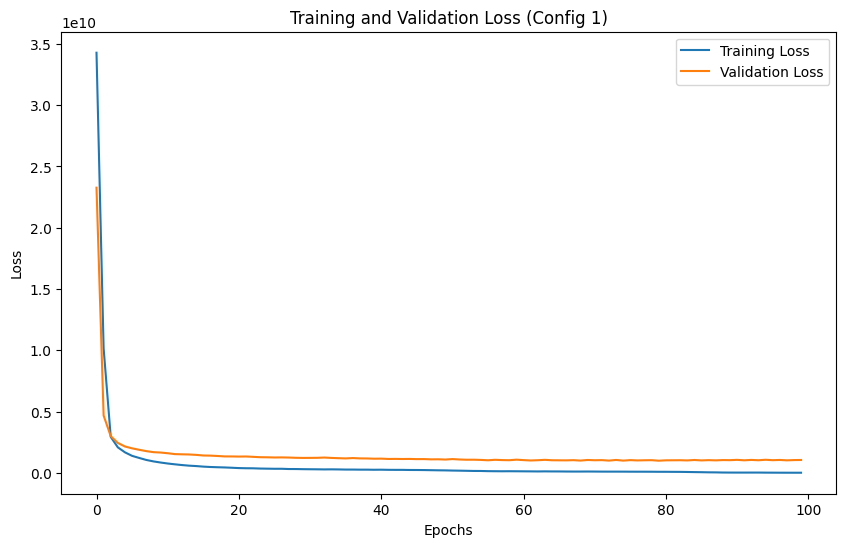

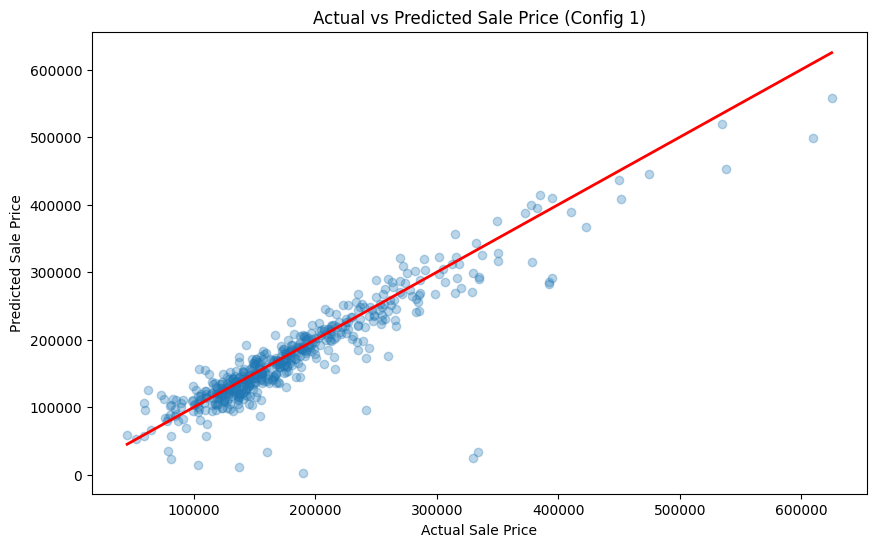

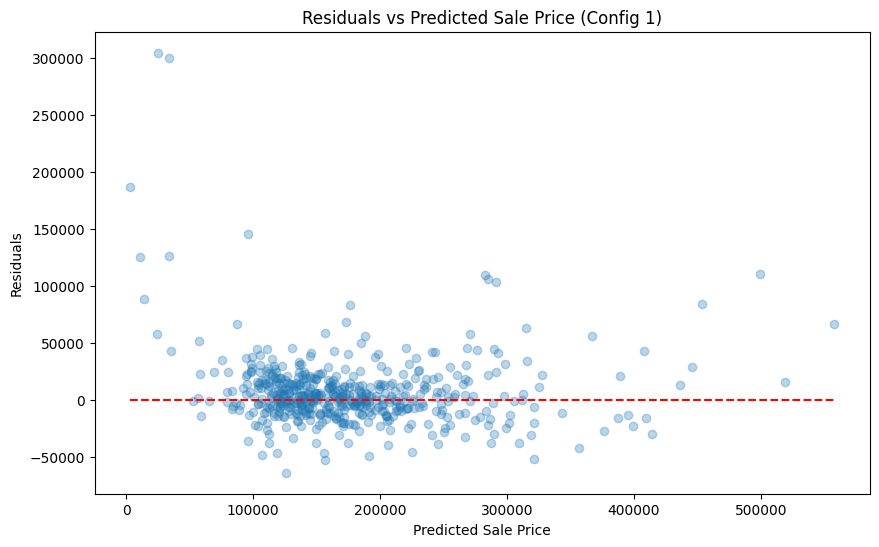

Configuration 2: {'layers': 3, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}
MSE: 1066139823.144897, R^2: 0.8266915082931519



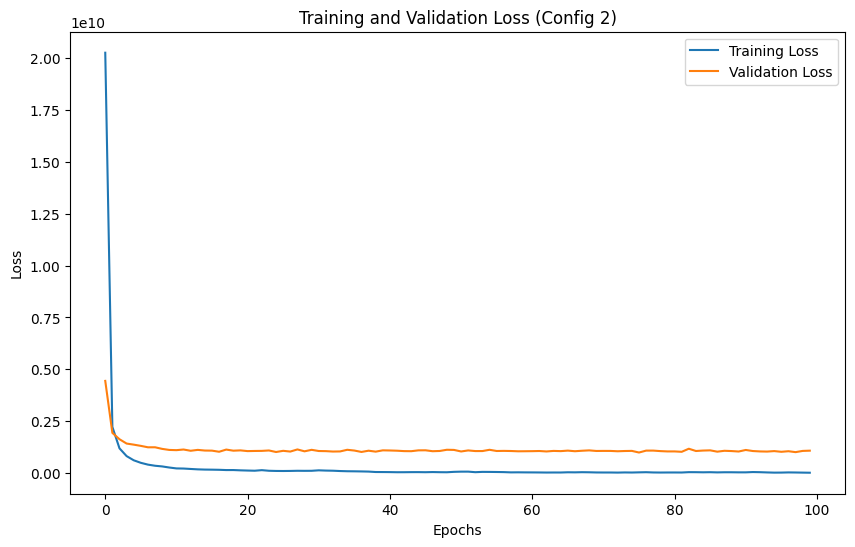

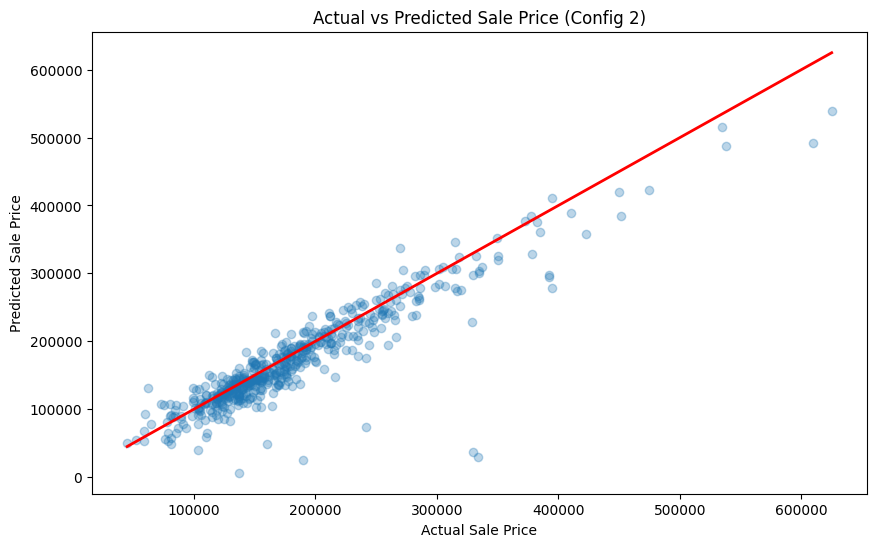

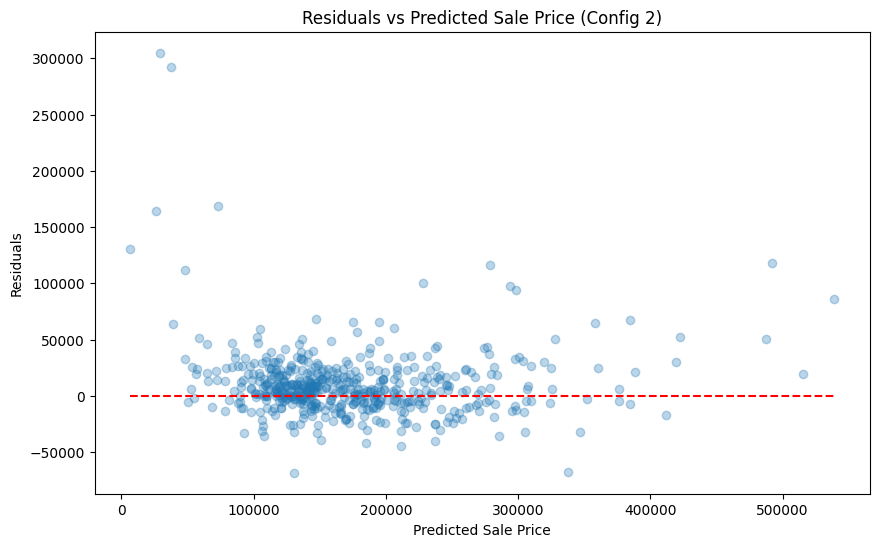

Configuration 3: {'layers': 4, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}
MSE: 1065493954.3397378, R^2: 0.8267964720726013



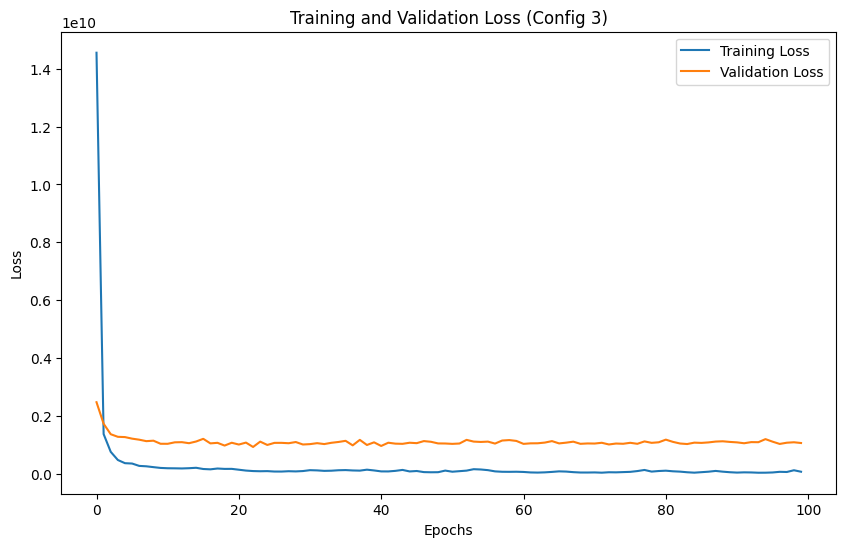

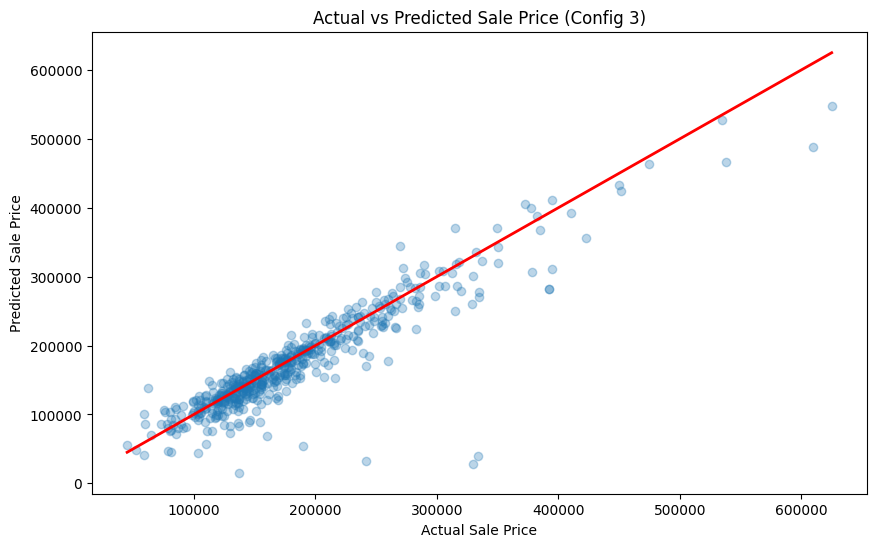

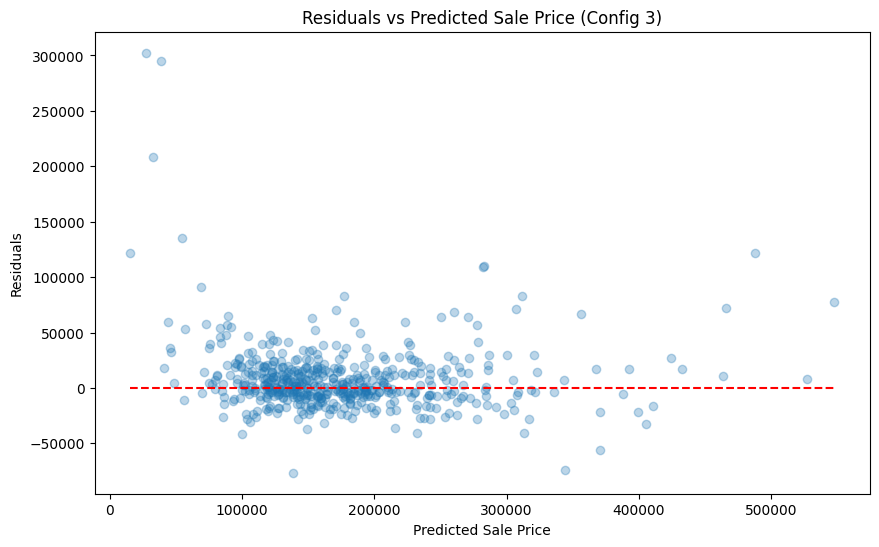

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Scale the features
scaler = StandardScaler()
features_all_scaled = scaler.fit_transform(features_all_original_imputed)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_scaled, target_original, test_size=0.2, random_state=42)

def build_and_train_model(layers, neurons, activation, optimizer, epochs=100, learning_rate=0.01):
    model = Sequential()
    model.add(Input(shape=(X_train_all.shape[1],)))
    
    for _ in range(layers):
        model.add(Dense(neurons, activation=activation))
        
    model.add(Dense(1))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    
    history = model.fit(X_train_all, y_train_all, epochs=epochs, validation_split=0.2, verbose=0)
    
    y_pred = model.predict(X_test_all).flatten()
    
    mse = mean_squared_error(y_test_all, y_pred)
    r2 = r2_score(y_test_all, y_pred)
    
    return history, mse, r2, y_pred

# Example configurations
configurations = [
    {'layers': 2, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01},
    {'layers': 3, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01},
    {'layers': 4, 'neurons': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}
]

results = []

for config in configurations:
    history, mse, r2, y_pred = build_and_train_model(**config)
    results.append((config, history, mse, r2, y_pred))

# Plot the results
for i, (config, history, mse, r2, y_pred) in enumerate(results):
    print(f"Configuration {i+1}: {config}")
    print(f"MSE: {mse}, R^2: {r2}\n")
    
    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss (Config {i+1})')
    plt.legend()
    plt.show()
    
    # Plot actual vs predicted sale prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_all, y_pred, alpha=0.3)
    plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(f'Actual vs Predicted Sale Price (Config {i+1})')
    plt.show()
    
    # Plot residuals
    residuals = y_test_all - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Sale Price (Config {i+1})')
    plt.show()


Training model with 2 layers, 32 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.8100876808166504
Training model with 2 layers, 32 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: -5.433907985687256
Training model with 2 layers, 32 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.9264553189277649
Training model with 2 layers, 32 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: -5.38830041885376
Training model with 2 layers, 64 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.8539422750473022
Training model with 2 layers, 64 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.428779125213623
Training model with 2 layers, 64 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.9288315773010254
Training model with 2 layers, 64 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: -5.339262008666992
Training model with 2 layers, 128 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.8907045722007751
Training model with 2 layers, 128 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R^2 Score: -5.418651580810547
Training model with 2 layers, 128 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.926916778087616
Training model with 2 layers, 128 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.242099761962891
Training model with 3 layers, 32 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R^2 Score: 0.8982760310173035
Training model with 3 layers, 32 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.433971881866455
Training model with 3 layers, 32 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.927341639995575
Training model with 3 layers, 32 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R^2 Score: -5.388286590576172
Training model with 3 layers, 64 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R^2 Score: 0.9189949631690979
Training model with 3 layers, 64 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.42884635925293
Training model with 3 layers, 64 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.9213247895240784
Training model with 3 layers, 64 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.339265823364258
Training model with 3 layers, 128 neurons, learning rate 0.001, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R^2 Score: 0.9217721223831177
Training model with 3 layers, 128 neurons, learning rate 0.001, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.418699741363525
Training model with 3 layers, 128 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.9184560179710388
Training model with 3 layers, 128 neurons, learning rate 0.01, activation tanh


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: -5.242206573486328
Best R^2 Score: 0.9288315773010254
Best parameters: {'n_layers': 2, 'n_neurons': 64, 'learning_rate': 0.01, 'activation': 'relu'}
Epoch 1/50


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 36825231360.0000 - mae: 177133.7344 - val_loss: 27567278080.0000 - val_mae: 152830.0469
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20476100608.0000 - mae: 119501.7266 - val_loss: 1656756096.0000 - val_mae: 32841.4609
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1399000320.0000 - mae: 27081.0332 - val_loss: 931351168.0000 - val_mae: 21632.8594
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1080138496.0000 - mae: 21348.7324 - val_loss: 790873152.0000 - val_mae: 19151.0332
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 783529984.0000 - mae: 18573.2324 - val_loss: 700678272.0000 - val_mae: 17955.0273
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 655156352.0000 - mae: 16658.7637 - val_loss: 643267200.0000 - val_mae: 17263.9727
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 626419200.0000 - mae: 16630.2773 - val_loss: 598909440.0000 - val_mae: 16505.0488
Epoch 8/50
52/52 ━

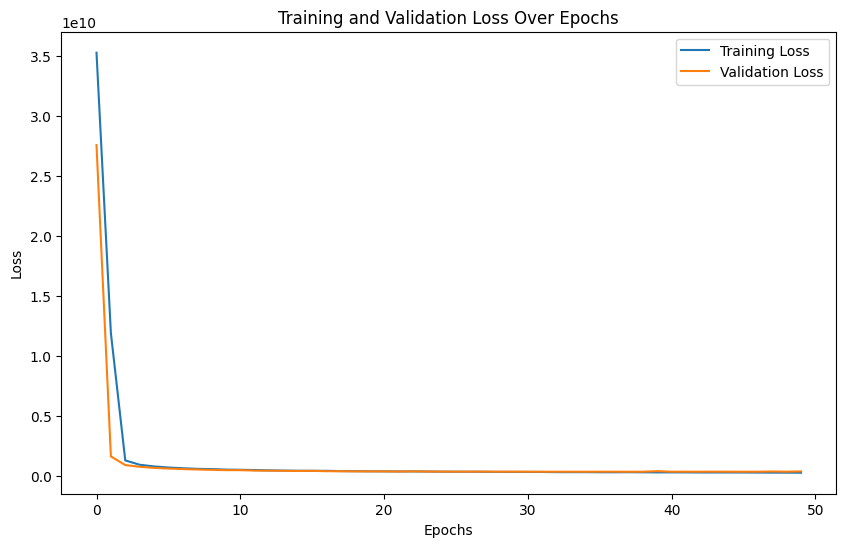

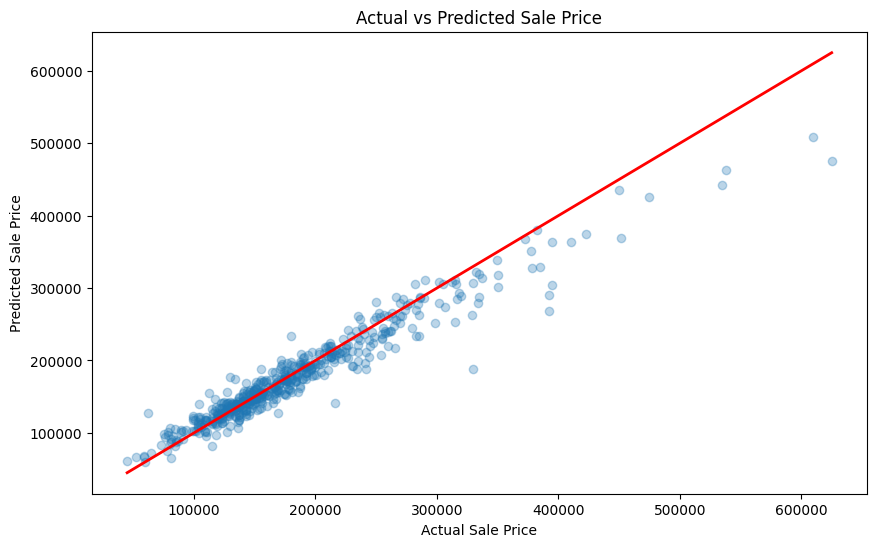

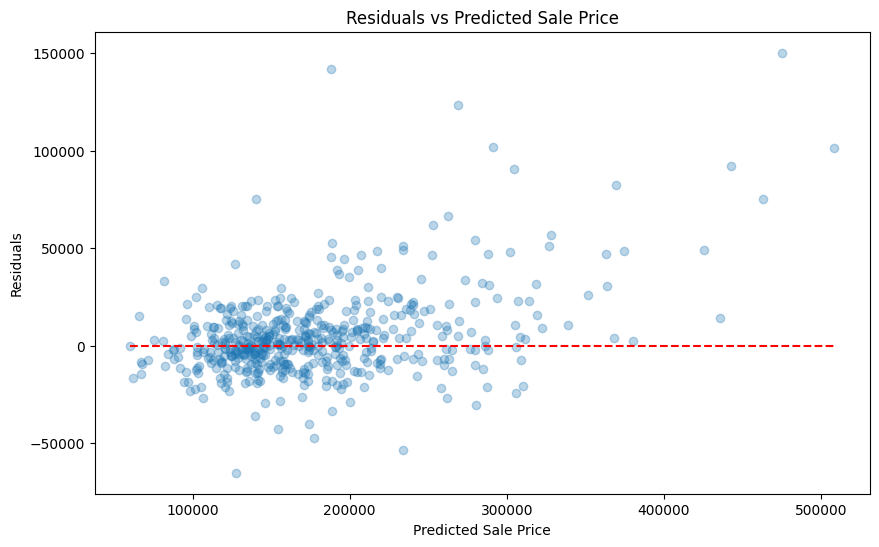

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define a function to build the model with different hyperparameters
def build_model(n_layers, n_neurons, learning_rate, activation):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Hyperparameters to try
n_layers_options = [2, 3]
n_neurons_options = [32, 64, 128]
learning_rate_options = [0.001, 0.01]
activation_options = ['relu', 'tanh']

# Track the best model and its parameters
best_r2 = -np.inf
best_params = {}

# Perform the grid search
for n_layers in n_layers_options:
    for n_neurons in n_neurons_options:
        for learning_rate in learning_rate_options:
            for activation in activation_options:
                print(f'Training model with {n_layers} layers, {n_neurons} neurons, learning rate {learning_rate}, activation {activation}')
                model = build_model(n_layers, n_neurons, learning_rate, activation)
                history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test).flatten()
                r2 = r2_score(y_test, y_pred)
                print(f'R^2 Score: {r2}')
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {
                        'n_layers': n_layers,
                        'n_neurons': n_neurons,
                        'learning_rate': learning_rate,
                        'activation': activation
                    }

print(f'Best R^2 Score: {best_r2}')
print(f'Best parameters: {best_params}')

# Train the best model again with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_neurons'], best_params['learning_rate'], best_params['activation'])
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)
test_loss, test_mae = best_model.evaluate(X_test, y_test)
y_pred = best_model.predict(X_test).flatten()
best_r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Best R^2 Score: {best_r2}')

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')
plt.show()


Training model with 2 layers, 64 neurons, learning rate 0.01, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R^2 Score: 0.9317740797996521
Training model with 2 layers, 64 neurons, learning rate 0.1, activation relu


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R^2 Score: 0.9124187231063843
Best R^2 Score: 0.9317740797996521
Best parameters: {'n_layers': 2, 'n_neurons': 64, 'learning_rate': 0.01, 'activation': 'relu'}
Epoch 1/50


/opt/anaconda3/envs/ENV_NAME/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 37078433792.0000 - mae: 176273.6406 - val_loss: 27471960064.0000 - val_mae: 152514.9531
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19552190464.0000 - mae: 117804.6797 - val_loss: 1700933888.0000 - val_mae: 33868.5703
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1365712512.0000 - mae: 27650.4297 - val_loss: 925930240.0000 - val_mae: 22004.0977
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 949967040.0000 - mae: 19758.8438 - val_loss: 779674624.0000 - val_mae: 19782.4297
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 805296768.0000 - mae: 18925.1172 - val_loss: 701663808.0000 - val_mae: 18733.9355
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 775506688.0000 - mae: 18445.9336 - val_loss: 639867456.0000 - val_mae: 17084.7754
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 682238016.0000 - mae: 16053.3604 - val_loss: 584866752.0000 - val_mae: 16668.4883
Epoch 8/50
52/52 ━━

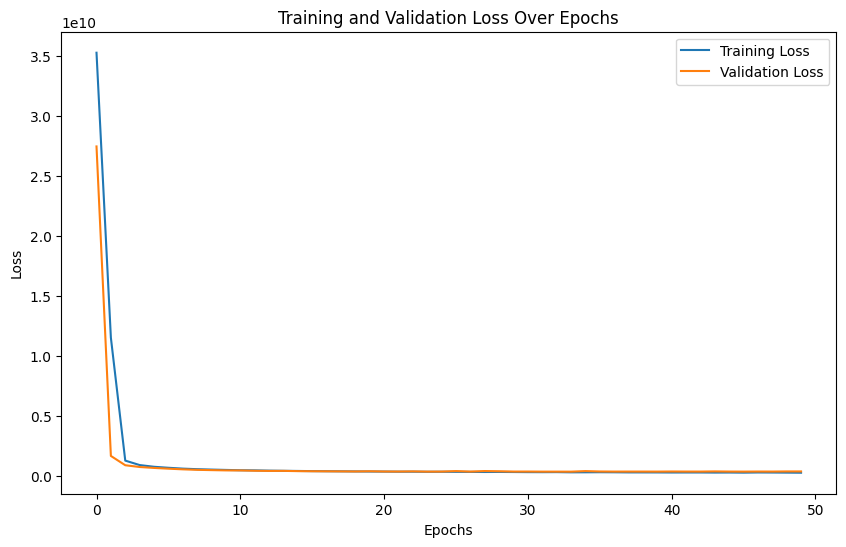

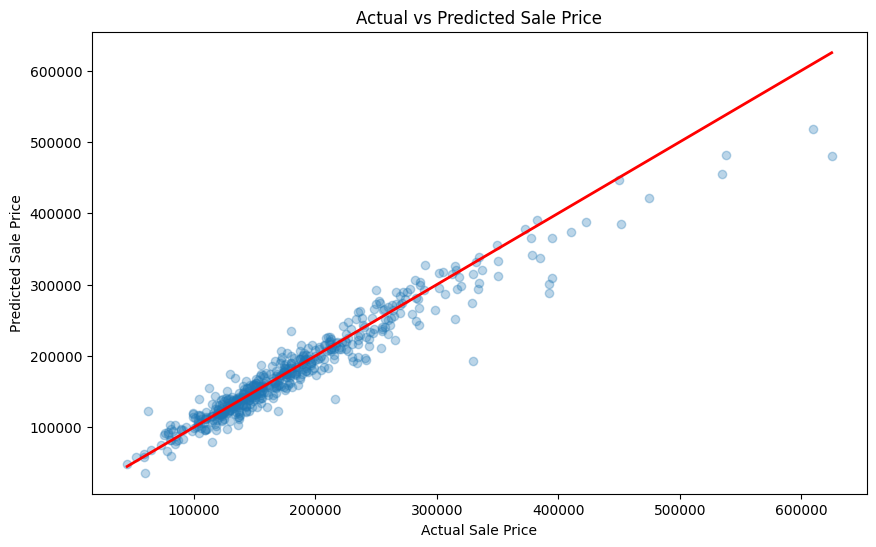

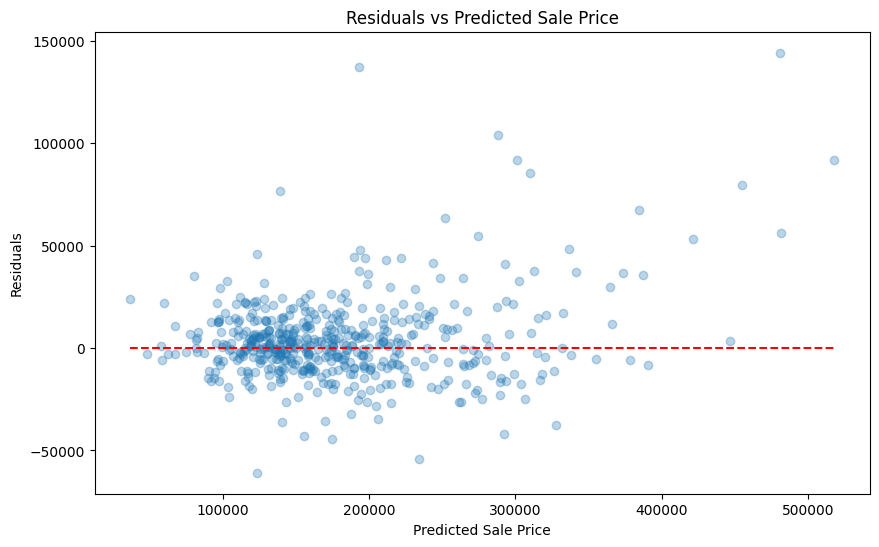

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define a function to build the model with different hyperparameters
def build_model(n_layers, n_neurons, learning_rate, activation):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Hyperparameters to try
n_layers_options = [2]
n_neurons_options = [64]
learning_rate_options = [ 0.01, .1]
activation_options = ['relu']

# Track the best model and its parameters
best_r2 = -np.inf
best_params = {}

# Perform the grid search
for n_layers in n_layers_options:
    for n_neurons in n_neurons_options:
        for learning_rate in learning_rate_options:
            for activation in activation_options:
                print(f'Training model with {n_layers} layers, {n_neurons} neurons, learning rate {learning_rate}, activation {activation}')
                model = build_model(n_layers, n_neurons, learning_rate, activation)
                history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test).flatten()
                r2 = r2_score(y_test, y_pred)
                print(f'R^2 Score: {r2}')
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {
                        'n_layers': n_layers,
                        'n_neurons': n_neurons,
                        'learning_rate': learning_rate,
                        'activation': activation
                    }

print(f'Best R^2 Score: {best_r2}')
print(f'Best parameters: {best_params}')

# Train the best model again with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_neurons'], best_params['learning_rate'], best_params['activation'])
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)
test_loss, test_mae = best_model.evaluate(X_test, y_test)
y_pred = best_model.predict(X_test).flatten()
best_r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Best R^2 Score: {best_r2}')

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot actual vs predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')
plt.show()
